# Проект: анализ развлекательного приложения Procrastinate Pro+

# Описание проекта.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Необходимо изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

Установить дату анализа как 1 ноября 2019 года.


# План работы.

**1. Загрузить данные и подготовить их к анализу.**
<br>
<br>Загрузить данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
<br>Пути к файлам:
* /datasets/visits_info_short.csv.
* /datasets/orders_info_short.csv.
* /datasets/costs_info_short.csv.

Изучить данные и выполнить предобработку. Проверить данные на пропуски и дубликаты. Проверить, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратить внимание на столбцы с датой и временем.

**2. Задать функции для расчёта и анализа LTV, ROI, удержания, конверсии и функции для построения графиков.**

Функции для вычисления значений метрик:
* get_profiles() — для создания профилей пользователей,
* get_retention() — для подсчёта Retention Rate,
* get_conversion() — для подсчёта конверсии,
* get_ltv() — для подсчёта LTV.

Функции для построения графиков:
* filter_data() — для сглаживания данных,
* plot_retention() — для построения графика Retention Rate,
* plot_conversion() — для построения графика конверсии,
 * plot_ltv_roi — для визуализации LTV и ROI.
 
**3. Исследовательский анализ данных.**
* Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
* Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
* Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
* Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулировать выводы.

**4. Маркетинг.**
* Посчитать общую сумму расходов на маркетинг.
* Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
* Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразить это на одном графике.
* Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Использовать для этого профили пользователей.

Написать промежуточные выводы.

**5. Оценка окупаемости рекламы.**

Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. 
<br>*Установить дату анализа как 1 ноября 2019 года.*
<br>В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Определить необходимость включения в анализ органических пользователей.
* Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
* Проверить конверсию пользователей, динамику её изменения и удержание пользователей. Построить и изучить графики конверсии и удержания.
* Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
* Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
* Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Ответить на следующие вопросы: 
* Окупается ли реклама, направленная на привлечение пользователей в целом?
* Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* Чем могут быть вызваны проблемы окупаемости?

Написать вывод, описать возможные причины обнаруженных проблем и дать промежуточные рекомендации для рекламного отдела.

**6. Написать общий вывод.**
* Выделить причины неэффективности привлечения пользователей.
* Сформулировать рекомендации для отдела маркетинга.


# Выполнение проекта.

## Загрузка данных и подготовка их к анализу.

### Подключение необходимых библиотек и загрузка данных.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# читаем файлы по абсолютному пути (для ревью)
try :
    visits_df = pd.read_csv('/datasets/visits_info_short.csv')
    orders_df = pd.read_csv('/datasets/orders_info_short.csv')
    costs_df = pd.read_csv('/datasets/costs_info_short.csv')
    
# читаем файлы из подкаталога (для локальной работы)
except :
    visits_df = pd.read_csv('datasets/visits_info_short.csv')
    orders_df = pd.read_csv('datasets/orders_info_short.csv')
    costs_df = pd.read_csv('datasets/costs_info_short.csv')

Данные прочитаны. Посмотрим, что прочиталось:

In [3]:
visits_df.head(2)

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35

In [4]:
orders_df.head(2)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99

In [5]:
costs_df.head(2)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1

### Приведение названий столбцов к нормальному виду.

Необходимо откорректировать названия столбцов во всех трех таблицах (заменить пробелы на символ "_" и прописные буквы на строчные). Для этого используем функцию, приводящую названия к нормальному виду (написана заранее, т.к. операция типичная):

In [6]:
def columns_names_std(columns_names):
    """
    Функция получает список имен всех столбцов и приводит их к нормальному виду
    путем замены "ненужных" символов из списка chars_to_replace на '_'
    и вставки символа '_' перед заглавными буквами или числами из списка markers
    с последующим изменением всех букв на строчные.
    Любой из этих двух списков может быть дополнен или сокращен.
    """
    
    markers = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    chars_to_replace = '*-.,'

    # создадим пустой словарь для переименования
    new_names_dict = {}
    
    # разложим список названий на отдельные названия
    for name in columns_names :
        
        # создадим переменную для карты для внесения изменений 
        # и копию имени, которую и будем редактировать, оставив при этом оригинал
        marker_maps = []
        new_name = name
        
        # заменим все символы "_" на пробелы, чтобы избежать задвоений, затроений и т.п.
        new_name = new_name.replace('_', ' ')
              
        # проверим копию названия на наличе в ней символов для замены и заменим их, если они есть
        for ch in chars_to_replace :
            new_name = new_name.replace(ch, ' ')
        
        # заполним карту индексами маркеров, если они есть
        for i,ch in enumerate(new_name) :
            if ch in markers :
                marker_maps.append(i)
        
        # если карта непустая
        if marker_maps != [] :
            
            # проверим наличие серийных маркеров, чтобы избежать разделения числа на цифры или имени на буквы и т.п.
            # для упрощения алгоритма сделаем это от хвоста к началу
            for i in marker_maps[::-1] :
                
                # если предыдущее значение тоже маркер, значит, это серия и текущее значение удаляем из карты
                # так мы оставим только первый элемент серии
                if (i-1) in marker_maps :
                    marker_maps.remove(i)
                    
            # добавим разделитель перед каждым оставшимся маркером
            # добавление производим тоже в обратном порядке, чтобы не смещать еще необработанные индексы
            for i in marker_maps[::-1] :
                new_name = new_name[:i] + ' ' + new_name[i:]
        
        # теперь разложим строку нового названия на элементы, 
        # соберем элементы в строку с символом '_' в качестве разделителя
        # и уберем все заглавные буквы, они больше не нужны.
        # соберем старые и новые значения в словарь
        new_names_dict[name] = str.lower('_'.join(new_name.split()))
    
    return new_names_dict

In [7]:
# Применим функцию ко всем трем таблицам:
visits_df = visits_df.rename(columns=columns_names_std(visits_df.columns))
orders_df = orders_df.rename(columns=columns_names_std(orders_df.columns))
costs_df = costs_df.rename(columns=columns_names_std(costs_df.columns))

Посмотрим на результат:

In [8]:
visits_df.head(2)

user_id         region  device  channel        session_start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35

In [9]:
orders_df.head(2)

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99

In [10]:
costs_df.head(2)

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1

Теперь с названиями все ОК. 

### Предобработка данных.

Проверим таблицы на дубликаты:

In [11]:
visits_df.duplicated().sum()

0

In [12]:
orders_df.duplicated().sum()

0

In [13]:
costs_df.duplicated().sum()

0

Дубликатов нет. Проверим на пропуски и типы данных:

In [14]:
print('visits_df.info:')
print(visits_df.info(), '\n')
print('*'*40)
print('orders_df.info:')
print(orders_df.info(), '\n')
print('*'*40)
print('costs_df.info:')
print(costs_df.info())

visits_df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None 

****************************************
orders_df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None 

*********************************

Пропусков нет. 

Преобразуем типы данных для столбцов, хранящих дату и время:

In [15]:
visits_df['session_start'] = pd.to_datetime(visits_df['session_start'])
visits_df['session_end'] = pd.to_datetime(visits_df['session_end'])
orders_df['event_dt'] = pd.to_datetime(orders_df['event_dt'])
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

Проверим результат:

In [16]:
print('visits_df.info:')
print(visits_df.info(), '\n')
print('*'*40)
print('orders_df.info:')
print(orders_df.info(), '\n')
print('*'*40)
print('costs_df.info:')
print(costs_df.info())

visits_df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None 

****************************************
orders_df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  f

Четыре преобразования прошли успешно.

Проверим наличие ошибок в журнале сессий:

In [17]:
visits_df['session_err'] = visits_df.session_start > visits_df.session_end
print('Количество ошибок в сессиях:' ,visits_df.session_err.sum())
visits_df = visits_df.drop('session_err', axis=1)

Количество ошибок в сессиях: 0


Посмотрим минимальную и максимальную стоимость привлечения:

In [18]:
print('Минимальная стоимость привлечения:', costs_df.costs.min())
print('Максимальная стоимость привлечения:', costs_df.costs.max())

Минимальная стоимость привлечения: 0.8
Максимальная стоимость привлечения: 630.0


Посмотрим на наличие пропусков в данных:

In [19]:
print(visits_df.isna().sum(), '\n', '*'*10)
print(orders_df.isna().sum(), '\n', '*'*10)
print(costs_df.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64 
 **********
user_id     0
event_dt    0
revenue     0
dtype: int64 
 **********
dt         0
channel    0
costs      0
dtype: int64


Посмотрим на распределение CAC:

Text(0, 0.5, 'Количество пользователей')

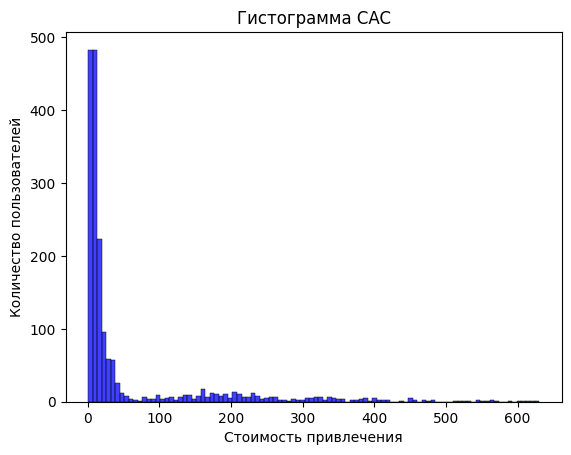

In [20]:
# построим гистограмму:
sns.histplot(costs_df.costs, bins=100, color = 'blue')

plt.title('Гистограмма CAC')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Количество пользователей')

Предобработка данных завершена.

### Вывод: Загрузка данных и подготовка их к анализу.

**На этапе загрузки и предобработки данных было проделано:**

1. Загружены данных из 3х файлов:
* `visits_info_short.csv` - лог сервера с информацией о посещениях сайта, 
* `orders_info_short.csv` — информация о заказах, 
* `costs_info_short.csv` — информация о расходах на рекламу.
2. Названия столбцов во всех трех таблицах приведены к нормальному виду - прописные буквы заменены на строчные, пробелы на символ "_".
3. Все таблицы проверены на дубликаты - дубликатов не обнаружено.
4. Для 4 столбцов, хранящих дату и время, изменен формат данных с `object` на `datetime64`:
* `visits_df['session_start']`
* `visits_df['session_end']`
* `orders_df['event_dt']`
* `costs_df['dt']`

## Определение функций.

### `get_profiles`.

In [21]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # преобразуем new_users['dt'] в формат datetime
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # преобразуем profiles['dt'] в формат datetime
    profiles['dt'] = pd.to_datetime(profiles['dt'])

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### `get_retention`

In [22]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### `get_conversion`

In [23]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### `get_ltv`

In [24]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### `filter_data`

In [25]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### `plot_retention`

In [26]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### `plot_conversion`

In [27]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### `plot_ltv_roi`

In [28]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### `plot_ltv_roi_big`

In [29]:
# тоже самое, что plot_ltv_roi, только строит укрупненные графики

def plot_ltv_roi_big(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 50))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(5, 1, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(fontsize=20)
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(5, 1, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(fontsize=20)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(5, 1, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(fontsize=20)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(5, 1, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=20)
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(5, 1, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=20)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Вывод: Определение функций.

Функции:
* get_profiles.
* get_retention
* get_conversion
* get_ltv
* filter_data
* plot_retention
* plot_conversion
* plot_ltv_roi
* plot_ltv_roi_big

определены.

## Исследовательский анализ данных.

### 	Создание профили пользователей. Определение минимальной и максимальной даты привлечения пользователей.

Сформируем таблицу с профилями пользователей:

In [30]:
# каких-либо событий у нас нет
events = None

# построим саму таблицу
profiles_df = get_profiles(visits_df, orders_df, events, costs_df)
profiles_df.head(2)

user_id            first_ts   channel  device         region         dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
1  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States 2019-07-09   

                month  payer  acquisition_cost  
0 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 12:46:07  False          1.107237

 Определим минимальную и максимальную даты привлечения пользователей:

In [31]:
min_date = profiles_df['first_ts'].min()
max_date = profiles_df['first_ts'].max()

print('Дата и время привлечения первого пользователя:')
print(datetime.strftime(min_date, '%Y-%m-%d'))
print(datetime.strftime(min_date, '%H:%M:%S'))
print()

print('Дата и время привлечения последнего пользователя:')
print(datetime.strftime(max_date, '%Y-%m-%d'))
print(datetime.strftime(max_date, '%H:%M:%S'))

Дата и время привлечения первого пользователя:
2019-05-01
00:00:41

Дата и время привлечения последнего пользователя:
2019-10-27
23:59:04


**Принимая во внимание время регистрации, можно утверждать, что и для первой и для последней даты привлечения мы имеем полные сутки, то есть корректно принять именно эти даты как начальную и конечную.** 

Дата привлечения первого пользователя: 2019-05-01

Дата привлечения последнего пользователя: 2019-10-27

Полученные даты соответствуют датам ТЗ.

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [32]:
for reg in list(sorted(profiles_df.region.unique())) :
    print(reg)

France
Germany
UK
United States


К нам приходят пользователи из 4х стран:
* France
* Germany
* UK
* United States

In [33]:
users_by_region = profiles_df.pivot_table(index='region', values='payer', aggfunc=['count', 'sum']) \
                             .droplevel(1, axis=1) \
                             .rename(columns={'count' : 'users', 'sum' : 'payers'})
users_by_region['payers_share'] = users_by_region['payers'] / users_by_region['users']
users_by_region.sort_values(by='users', ascending=False).style.format({'payers_share' : '{:.1%}'})

Количество пользователей из региона `United States` самое большое, отличается на порядок от остальных. Конверсия тоже самая высокая: 6,9%.

### Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [34]:
users_by_device = profiles_df.pivot_table(index='device', values='payer', aggfunc=['count', 'sum']) \
                             .droplevel(1, axis=1) \
                             .rename(columns={'count' : 'users', 'sum' : 'payers'})
users_by_device['payers_share'] = users_by_device['payers'] / users_by_device['users']
users_by_device.sort_values(by='users', ascending=False).style.format({'payers_share' : '{:.1%}'})

Количество пользователей `iPhone` самое большое. Конверсия почти самая высокая: 6,2%, выше только у `Mac`: 6.4%.

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [35]:
users_by_channel = profiles_df.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum']) \
                             .droplevel(1, axis=1) \
                             .rename(columns={'count' : 'users', 'sum' : 'payers'})
users_by_channel['payers_share'] = users_by_channel['payers'] / users_by_channel['users']
users_by_channel.sort_values(by='users', ascending=False).style.format({'payers_share' : '{:.1%}'})

Самый многочисленный канал: `organic`. Но и конверсия у него самая низкая: 2.1%, что естесственно - в платных каналах привлечения конверсия значительно выше.

Добавим в таблицу доли пользователей и плательщиков:

In [36]:
# рассчитаем долю привлеченных пользователей:
users_by_channel['users_share'] = users_by_channel['users'] / users_by_channel['users'].sum()

# рассчитаем долю плательщиков:
users_by_channel['payers_share'] = users_by_channel['payers'] / users_by_channel['payers'].sum()

# выведем отформатированный результат:
users_by_channel[['users', 'users_share', 'payers', 'payers_share']] \
    .sort_values(by='users', ascending=False) \
    .style.format({'payers_share' : '{:.1%}', 'users_share' : '{:.1%}'})

Три топовых платных канала дают примерно такое же привлечение пользователей, как и `organic`, а вот плательщиков почто в 5 раз больше.

### Вывод: Исследовательский анализ данных.

**В процессе исследовательского анализа данных было проделано:**

Составлены профили пользователей. Определены минимальная и максимальная даты привлечения пользователей:
<br>Минимальная дата: 2019-05-01
<br>Максимальная дата: 2019-10-27

---

Определено, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построена таблица, отражающая количество пользователей и долю платящих из каждой страны.

К нам приходят пользователи из 4х стран:
* France
* Germany
* UK
* United States

Количество пользователей и конверсия распределены следующим образом:

|    Страна     | Пользователи | Конверсия|
|:------------- |:------------ |:-------- |
| United States |    100002    |   6.9%   |
|     UK        |     17575    |   4.0%   |
|    France     |     17450    |   3.8%   |
|    Germany    |     14981    |   4.1%   |

---
Определено, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи:

| Устройство    | Пользователи | Конверсия|
|:------------- |:------------ |:-------- |
| iPhone |    54479    |   6.2%   |
|     Android |	35032 |	5.9%  |
|    PC |	30455 |	5.0%   |
|    Mac |	30042 |	6.4%   |

---
Изучены рекламные источники привлечения и определены каналы, из которых пришло больше всего платящих пользователей. Построена таблица, отражающую количество пользователей и долю платящих для каждого канала привлечения:

|     Канал     | Пользователи | Конверсия|
|:------------- |:------------ |:-------- |
|organic |	56439 |	2.1% |
| FaceBoom |	29144 |	12.2% |
| TipTop |	19561 |	9.6% |
| OppleCreativeMedia |	8605 |	2.7% |
| LeapBob |	8553 |	3.1% |
| WahooNetBanner |	8553 |	5.3% |
| RocketSuperAds |	4448 |	7.9% |
| MediaTornado |	4364 |	3.6% |
| YRabbit |	4312 |	3.8% |
| AdNonSense |	3880 |	11.3% |
| lambdaMediaAds |	2149 |	10.5% |

## Маркетинг.

### Посчитатаем общую сумму расходов на маркетинг.

In [37]:
print('Общая сумма расходов на маркетинг за период')
print('с 01 мая 2019 г по 27 октября 2019 составила:')
print(round(costs_df['costs'].sum(), 2))

Общая сумма расходов на маркетинг за период
с 01 мая 2019 г по 27 октября 2019 составила:
105497.3


### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [38]:
costs_df.pivot_table(index='channel', values='costs', aggfunc=['sum']) \
        .droplevel(0, axis=1) \
        .sort_values(by='costs', ascending= False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

Добавим в таблицу долю в расходах и накопительную долю:

In [39]:
# сохраним результат в таблицу:
costs_df_by_channel = costs_df.pivot_table(index='channel', values='costs', aggfunc=['sum']) \
        .droplevel(0, axis=1) \
        .sort_values(by='costs', ascending= False)

# рассчитаем долю:
costs_df_by_channel['share'] = costs_df_by_channel['costs'] / costs_df_by_channel['costs'].sum()

# вычислим накопительный итог по расходам:
costs_df_by_channel['cumsum'] = costs_df_by_channel.costs.cumsum()

# вычислим накопительную долю в расходах:
costs_df_by_channel['cum_share'] = costs_df_by_channel['cumsum'] / costs_df_by_channel['costs'].sum()

# удалим накопительный итог, больше не нужен:
costs_df_by_channel = costs_df_by_channel.drop('cumsum', axis=1)

# посмотрим на результат:
costs_df_by_channel.style.format({'share' : '{:.1%}', 'cum_share' : '{:.1%}', 'costs' : '{:.2f}'})

2 явных лидера - `TipTop` и `FaceBoom`. Забирают 82.7% бюджета.

Добавим в эту таблицу информацию о пользователях и плательщиках:

In [40]:
channel_df_info = costs_df_by_channel.join(users_by_channel, how='outer')
channel_df_info = channel_df_info.rename(columns={'share' : 'costs_share'})

# выведем отформатированный результат:
channel_df_info[['users', 'users_share', 'payers', 'payers_share', 'costs', 'costs_share']] \
    .sort_values(by='users', ascending=False) \
    .style.format({'costs' : '{:.2f}', 'payers_share' : '{:.1%}', 'users_share' : '{:.1%}', 'costs_share' : '{:.1%}'})

Уберем канал `organic` - посмотрим на цифры в разрезе бюджетов:

In [41]:
channel_df_info = channel_df_info.drop(index='organic')

# накопительный итог тоже лишний в этом контексте:
channel_df_info = channel_df_info.drop('cum_share', axis=1)

In [42]:
# пересчитаем доли только для платных каналов:
channel_df_info['users_share'] = channel_df_info['users'] / channel_df_info['users'].sum()
channel_df_info['payers_share'] = channel_df_info['payers'] / channel_df_info['payers'].sum()
channel_df_info['costs_share'] = channel_df_info['costs'] / channel_df_info['costs'].sum()

# выведем отформатированный результат:
channel_df_info[['users', 'users_share', 'payers', 'payers_share', 'costs', 'costs_share']] \
    .sort_values(by='users', ascending=False) \
    .style.format({'costs' : '{:.2f}', 'payers_share' : '{:.1%}', 'users_share' : '{:.1%}', 'costs_share' : '{:.1%}'})

2 явных лидера - `TipTop` и `FaceBoom`, на которые приходится 82.7% бюджета, привлекают суммарно 52% пользователей или 70.4% плательщиков (от платных каналов привлечения).

### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на одном графике.

Добавим столбцы с номером недели и месяца для расчета расходов:

In [43]:
costs_df['week'] = costs_df['dt'].dt.isocalendar().week
costs_df['month'] = costs_df['dt'].dt.month
costs_df.head(10)

dt   channel  costs  week  month
0 2019-05-01  FaceBoom  113.3    18      5
1 2019-05-02  FaceBoom   78.1    18      5
2 2019-05-03  FaceBoom   85.8    18      5
3 2019-05-04  FaceBoom  136.4    18      5
4 2019-05-05  FaceBoom  122.1    18      5
5 2019-05-06  FaceBoom  118.8    19      5
6 2019-05-07  FaceBoom  101.2    19      5
7 2019-05-08  FaceBoom  100.1    19      5
8 2019-05-09  FaceBoom   93.5    19      5
9 2019-05-10  FaceBoom  104.5    19      5

В первую неделю анализируемого периода не вошли 2 дня, поэтому данные будут ниже, чем для полной недели. Для нашего исследования это некритично, просто имеем это ввиду.

In [44]:
costs_df.tail(10)

dt         channel  costs  week  month
1790 2019-10-18  lambdaMediaAds    8.0    42     10
1791 2019-10-19  lambdaMediaAds    5.6    42     10
1792 2019-10-20  lambdaMediaAds    8.8    42     10
1793 2019-10-21  lambdaMediaAds    7.2    43     10
1794 2019-10-22  lambdaMediaAds    6.4    43     10
1795 2019-10-23  lambdaMediaAds    4.0    43     10
1796 2019-10-24  lambdaMediaAds    6.4    43     10
1797 2019-10-25  lambdaMediaAds    8.8    43     10
1798 2019-10-26  lambdaMediaAds    8.8    43     10
1799 2019-10-27  lambdaMediaAds   12.0    43     10

Последняя неделя вошла полностью, тут все ОК.

Подготовим данные по неделям и месяцам:

In [45]:
# по неделям:
weeks_costs = costs_df.pivot_table(index=['channel', 'week'], values='costs', 
                                   aggfunc=['sum']).reset_index().droplevel(1, axis=1)
weeks_costs = weeks_costs.pivot_table(index='channel', values='sum', columns='week')

# по месяцам
months_costs = costs_df.pivot_table(index=['channel', 'month'], values='costs', 
                                    aggfunc=['sum']).reset_index().droplevel(1, axis=1)
months_costs = months_costs.pivot_table(index='channel', values='sum', columns='month')

Для удобства отсортируем каналы по суммарным расходам (для легенды на графиках будет лучше восприятие):

In [46]:
# посчитаем общие расходы:
weeks_costs['total'] = weeks_costs.sum(axis=1)

# отсортируем таблицу по убыванию:
weeks_costs = weeks_costs.sort_values(by='total', ascending=False)

# удалим столбец с общими расходами, больше не нужен
weeks_costs = weeks_costs.drop('total', axis=1)

# смотрим результат:
weeks_costs

week                    18      19      20      21        22       23  \
channel                                                                 
TipTop              347.00  470.00  454.00  801.80  1421.200  1223.60   
FaceBoom            535.70  750.20  755.70  722.70  1208.900  1081.30   
WahooNetBanner       49.20   92.40   90.00   79.20   179.400   196.80   
AdNonSense          211.05  273.00  265.65  266.70   202.650   102.90   
OppleCreativeMedia   24.00   34.50   27.50   34.25    81.750    79.50   
RocketSuperAds       99.45  139.23  138.06  131.04    97.695    76.05   
LeapBob              16.80   31.71   26.67   26.67    65.520    66.99   
lambdaMediaAds       81.60  103.20   90.40  119.20    83.200    35.20   
MediaTornado         38.64   61.68   59.04   50.16    36.960    27.60   
YRabbit              52.20   75.90   69.30   65.40    49.800    25.80   

week                     24       25       26        27  ...       34  \
channel                                                  ...            
TipTop              1121.00  1474.40  2343.60  2340.000  ...  2514.00   
FaceBoom            1042.80  1280.40  1647.80  1536.700  ...  1411.30   
WahooNetBanner       166.20   201.60   285.00   256.800  ...   244.80   
AdNonSense            96.60   141.75   148.05   130.200  ...   142.80   
OppleCreativeMedia    71.50    79.75   107.00   102.500  ...   103.75   
RocketSuperAds        63.18    80.73    78.26    75.075  ...    40.30   
LeapBob               52.29    68.46    99.75    87.360  ...    90.51   
lambdaMediaAds        45.60    40.00    59.20    60.000  ...    57.60   
MediaTornado          29.76    32.16    40.56    43.440  ...    35.28   
YRabbit               17.46    22.14    27.90    28.260  ...    30.03   

week                     35        36       37        38       39       40  \
channel                                                                      
TipTop              2583.00  2563.000  2506.00  3241.000  3979.50  3703.00   
FaceBoom            1445.40  1151.700  1148.40  1496.000  1837.00  1761.10   
WahooNetBanner       235.80   174.600   192.60   226.200   303.00   309.00   
AdNonSense           133.35   100.800   100.80   139.650   192.15   155.40   
OppleCreativeMedia    92.75    72.750    78.00   105.750   132.25   123.00   
RocketSuperAds        51.35    40.625    40.95    56.225    63.70    66.30   
LeapBob               77.91    66.990    63.84    81.270   101.22   101.01   
lambdaMediaAds        54.40    52.000    41.60    57.600    80.00    59.20   
MediaTornado          33.84    30.240    25.92    30.240    48.24    42.00   
YRabbit               24.36    27.930    29.76    39.600    47.52    45.36   

week                      41        42       43  
channel                                          
TipTop              3097.500  2737.000  3265.50  
FaceBoom            1392.600  1291.400  1552.10  
WahooNetBanner       208.800   216.000   253.20  
AdNonSense           136.500   118.650   154.35  
OppleCreativeMedia    88.250    88.000   101.50  
RocketSuperAds        51.675    46.475    50.70  
LeapBob               78.960    69.720    84.42  
lambdaMediaAds        60.800    47.200    53.60  
MediaTornado          36.960    29.040    37.44  
YRabbit               38.310    36.450    48.33  

[10 rows x 26 columns]

In [47]:
# посчитаем общие расходы:
months_costs['total'] = months_costs.sum(axis=1)

# отсортируем таблицу по убыванию:
months_costs = months_costs.sort_values(by='total', ascending=False)

# удалим столбец с общими расходами, больше не нужен
months_costs = months_costs.drop('total', axis=1)

# смотрим результат:
months_costs

month                     5         6        7         8         9         10
channel                                                                      
TipTop              2981.00  6675.600  8410.20  11202.00  13232.50  12250.000
FaceBoom            3524.40  5501.100  5294.30   6274.40   6114.90   5736.500
WahooNetBanner       418.80   921.000   851.40   1040.40    977.40    942.000
AdNonSense          1169.70   538.650   504.00    579.60    581.70    537.600
OppleCreativeMedia   169.75   370.000   366.50    439.25    427.75    378.000
RocketSuperAds       577.98   325.715   252.07    253.11    218.40    205.725
LeapBob              140.28   314.580   313.53    369.81    343.98    315.420
lambdaMediaAds       458.40   199.200   219.20    220.00    247.20    213.600
MediaTornado         238.56   138.000   138.48    154.56    144.72    140.160
YRabbit              299.70   106.200    97.38    124.74    152.79    163.410

Данные готовы, можно строить графики:

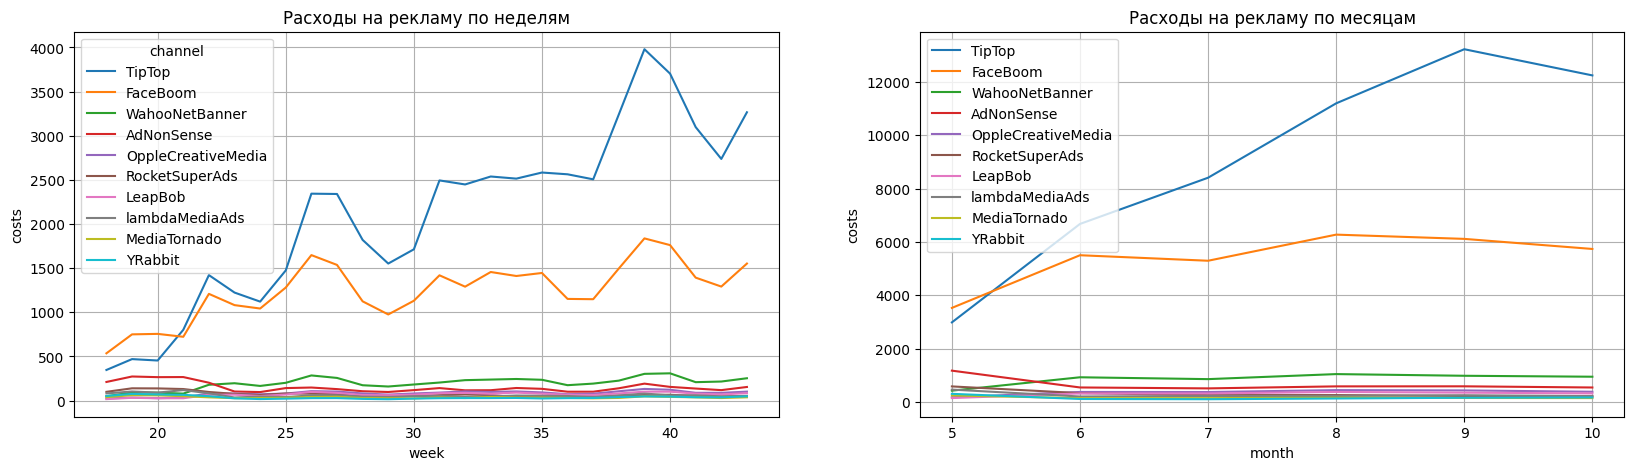

In [48]:
# задаем размер поля для графиков
plt.figure(figsize=(20, 5)) 

# транспонируем таблицу и строим 1й график:
weeks_costs.T.plot(grid=True, ax=plt.subplot(1, 2, 1))

# добавляем название графика и вертикальной оси:
plt.ylabel('costs');
plt.title('Расходы на рекламу по неделям')

# транспонируем таблицу и строим 2й график:
months_costs.T.plot(grid=True, ax=plt.subplot(1, 2, 2))

# добавляем название графика и вертикальной оси:
plt.ylabel('costs');
plt.title('Расходы на рекламу по месяцам')

# сдвигаем легенду в левый верхний угол, чтобы не загораживала самую важную информацию:
plt.legend(loc='upper left')

plt.show()

У нас есть 2 явных лидера по расходам - `TipTop` и `FaceBoom`. По динамике безусловный лидер - `TipTop`. Тревожный тренд.

### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Использоуем для этого профили пользователей.

Посчитаем CAC, данные возьмем из таблицы профилей пользователей:

In [49]:
# посчитаем количество по льзователей и затраты на рекламу по каналам:
cac_df = profiles_df.pivot_table(
    index='channel', 
    values=['user_id', 'acquisition_cost'], 
    aggfunc={'user_id':'count', 'acquisition_cost' : 'sum'})

# вычислим среднее для каждого канала:
cac_df['cac'] = cac_df['acquisition_cost'] / cac_df['user_id']

# отсортируем по убыванию:
cac_df.sort_values(by='cac', ascending=False).style.format({'cac' : '{:.2f}', 'acquisition_cost' : '{:.2f}'})

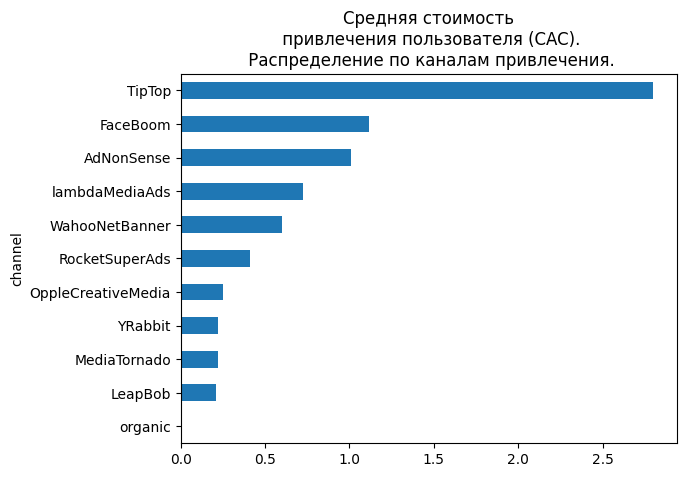

In [50]:
# визуализируем результат:
cac_df['cac'].sort_values() \
    .plot.barh(title='Средняя стоимость\n привлечения пользователя (CAC).\n Распределение по каналам привлечения.');

In [51]:
print('Средний CAC по всем платным каналам привлечения:')

# убираем один из количества каналов, мы считаем только платные:
print(round(cac_df['cac'].sum() /( len(cac_df) - 1), 1))

# можно еще так посчитать, результат тот же:
# print(round(cac_df.drop(index='organic')['cac'].mean(), 1))

Средний CAC по всем платным каналам привлечения:
0.8


### Вывод: Маркетинг.

**В процессе маркетингового ислледования было проделано:**

**Посчитана общая сумму расходов на маркетинг:**
<br>Общая сумма расходов на маркетинг за период с 01 мая 2019 г по 27 октября 2019 составила: **105 497.30**

**Определено, как траты распределены по рекламным источникам:**

2 явных лидера - `TipTop` и `FaceBoom`. Забирают 82.7% бюджета.
|Канал |  Затраты|
| :--- | ---: |
|TipTop |	54751.30 |
| FaceBoom |	32445.60 |
| WahooNetBanner |	5151.00 |
| AdNonSense |	3911.25 |
| OppleCreativeMedia |	2151.25 |
| RocketSuperAds |	1833.00 |
| LeapBob |	1797.60 |
| lambdaMediaAds |	1557.60 |
| MediaTornado |	954.48 |
| YRabbit |	944.22 |

При этом привлекают суммарно 52% пользователей или 70.4% плательщиков (от платных каналов привлечения).

**Визуализирована динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику:**

На основании графиков видно, что есть 2 явных лидера по расходам - `TipTop` и `FaceBoom`. По динамике безусловный лидер - `TipTop`.

**Определено, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Для этого использованы профили пользователей.**

С большим отрывом лидирует `TipTop`.
| Канал | CAC |
| :--- | ---: |
| TipTop |	2.80 |
| FaceBoom |	1.11 |
| AdNonSense |	1.01 |
| lambdaMediaAds |	0.72 |
| WahooNetBanner |	0.60 |
| RocketSuperAds |	0.41 |
| OppleCreativeMedia |	0.25 |
| YRabbit |	0.22 |
| MediaTornado |	0.22
| LeapBob |	0.21 |
| organic |	0.00 |

Средний CAC по всем платным каналам привлечения: **0.8**

## Оценка окупаемости рекламы.

Установим горизонт анализа:

In [52]:
# установим горизонта анализа 14 дней - соглосно бизнесплану:
analysis_horizon = 14

### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [53]:
profiles_df = profiles_df.query('channel != "organic"')

# формальная проверка - у нас должно остаться 10 платных каналов:
print(*(profiles_df.channel.unique()) )

FaceBoom AdNonSense YRabbit MediaTornado RocketSuperAds LeapBob TipTop WahooNetBanner OppleCreativeMedia lambdaMediaAds


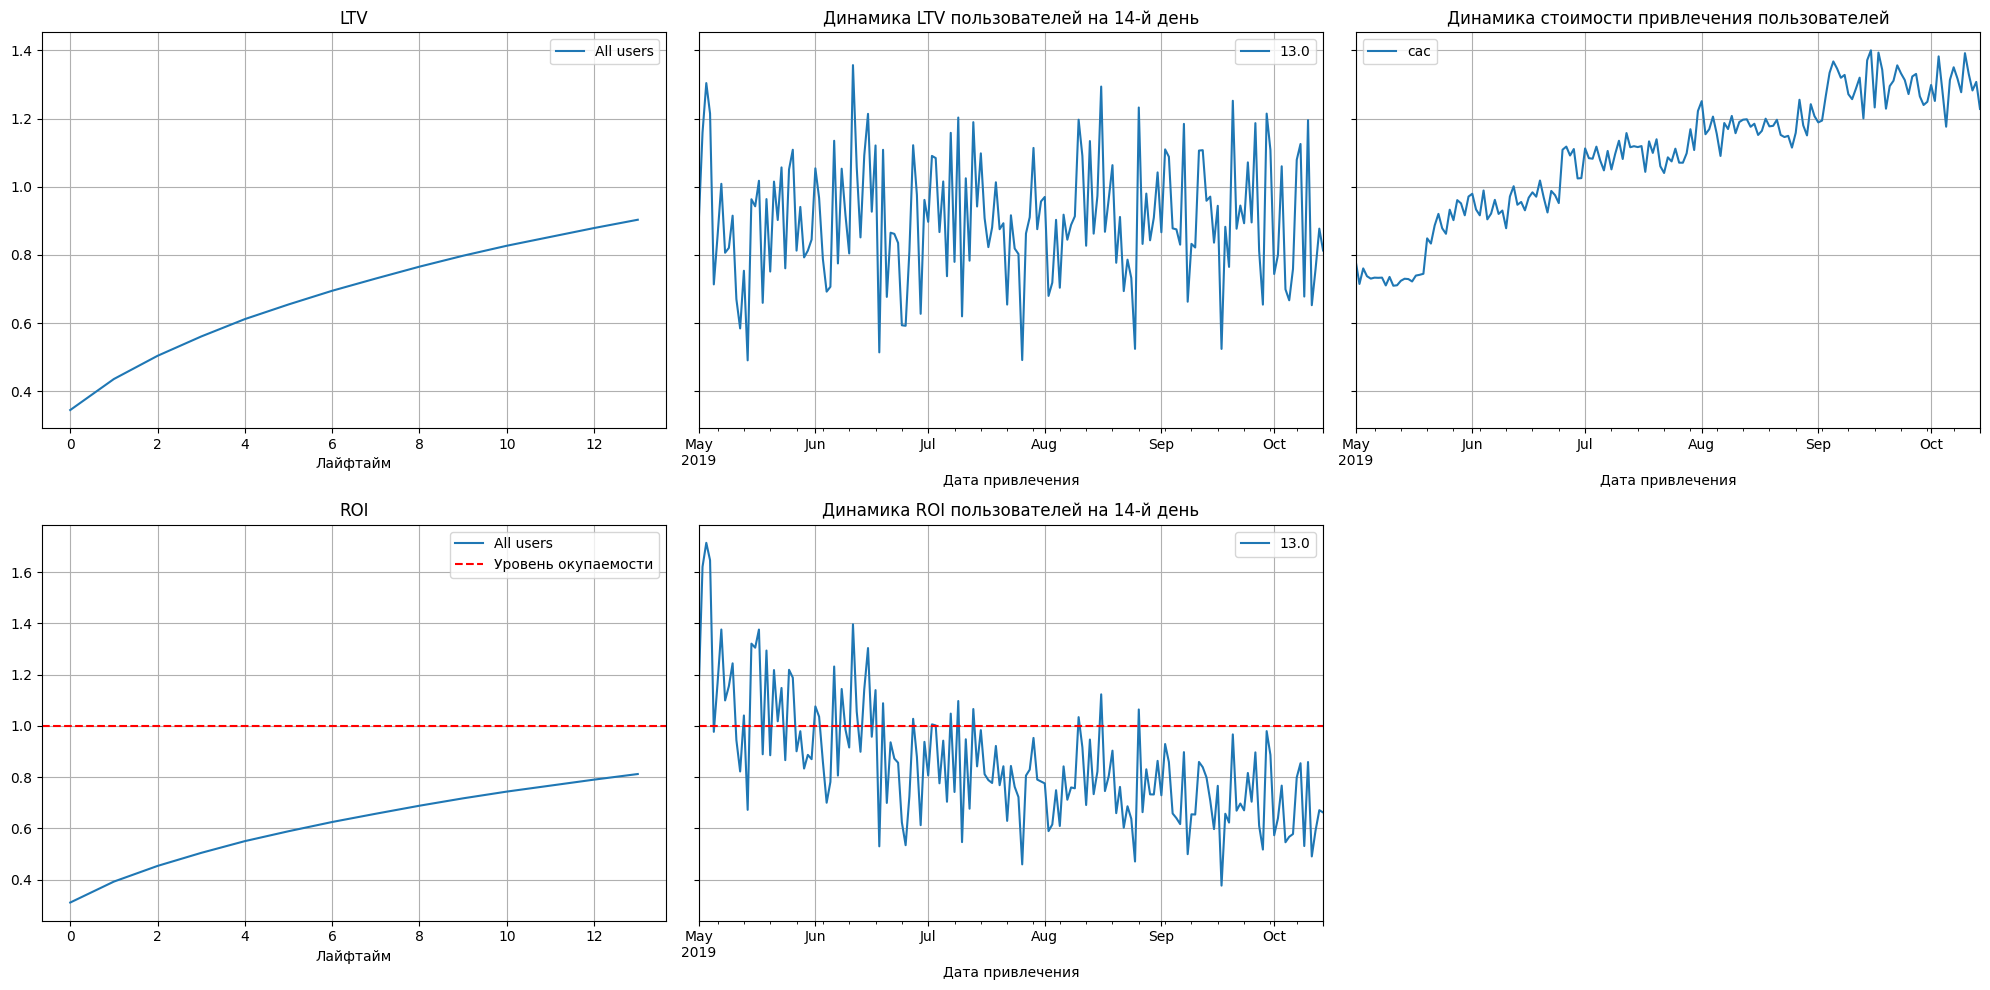

In [54]:
# получим данные для построения графиков LTV и ROI:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_df, orders_df, max_date.date(), analysis_horizon)

# построим сами графики:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=1)

В целом на горизонте 14 дней - **реклама НЕ окупается**

Тревожный тренд из п.4.4.3 (расходы на рекламу постоянно росли) дает о себе знать - драматический рост расходов на рекламу привел к тому, что уже почти сразу, в начале мая, ROI впервые пробил вниз границу рентабельности. Начиная с середины июня ROI выше 1 практически не бывает - **маркетинг стал убыточным.**

Большой разброс в динамике LTV.

### Проверим конверсию пользователей, динамику её изменения и удержание пользователей. Построим и изучим графики конверсии и удержания.

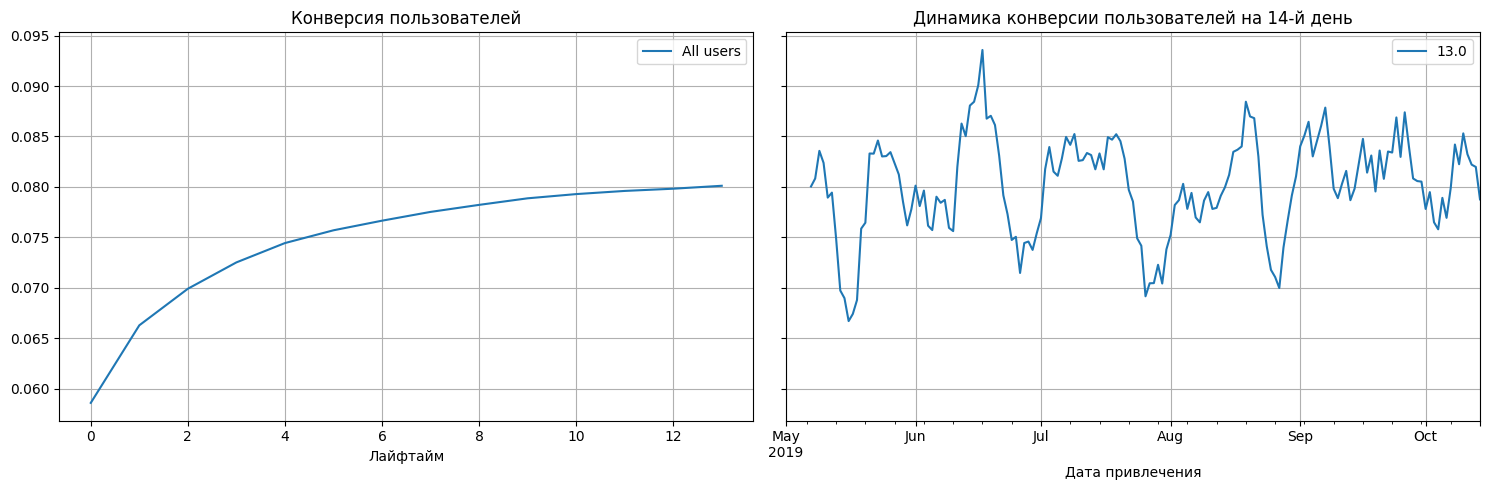

In [55]:
# получим данные для построения графиков конверсии:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_df, orders_df, max_date.date(), analysis_horizon
)

# построим сами графики:
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

Общая конверсия достигает 8%, динамика конверсии имеет периодичность. В каждом месяце, за исключением сентября, имеют место сильные провалы. 

Отдельно необходимо рассмотреть сентябрь - единственный месяц, в котором нет сильных падений конверсии.

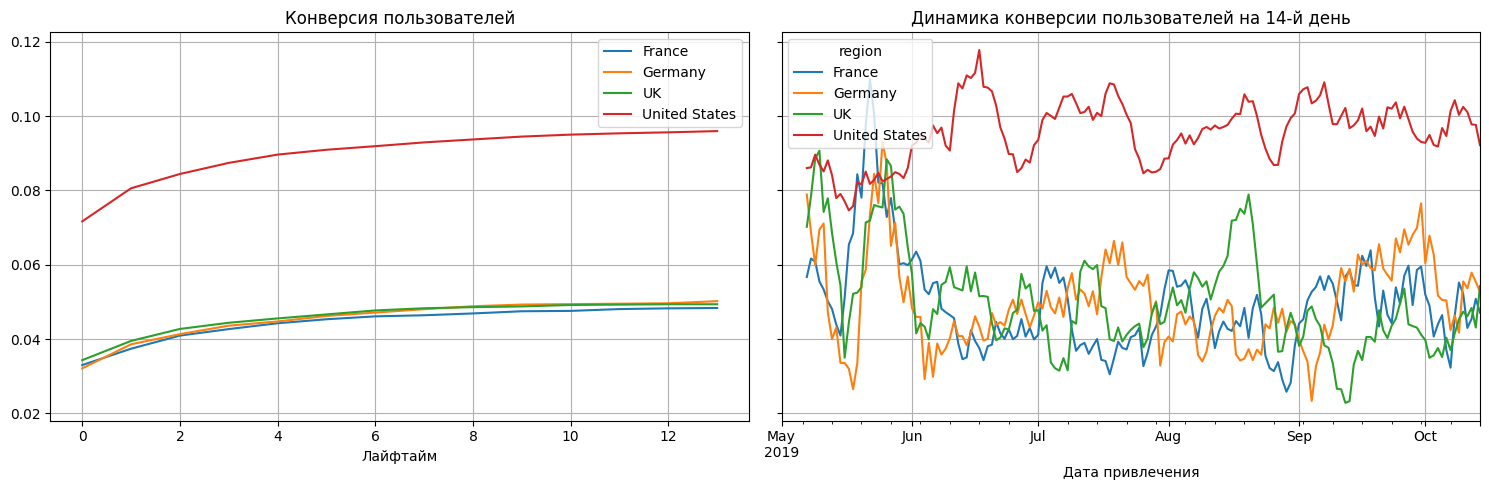

In [56]:
# получим данные для построения графиков конверсии по регионам:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_df, orders_df, max_date.date(), analysis_horizon, dimensions=['region']
)

# построим сами графики:
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

Самая высокая конверсия в регионе `United States`, в остальных трех картина практически идентичная. Динамика конверсии в `United States` также значительно выше и имеет меньший диапазон колебаний.

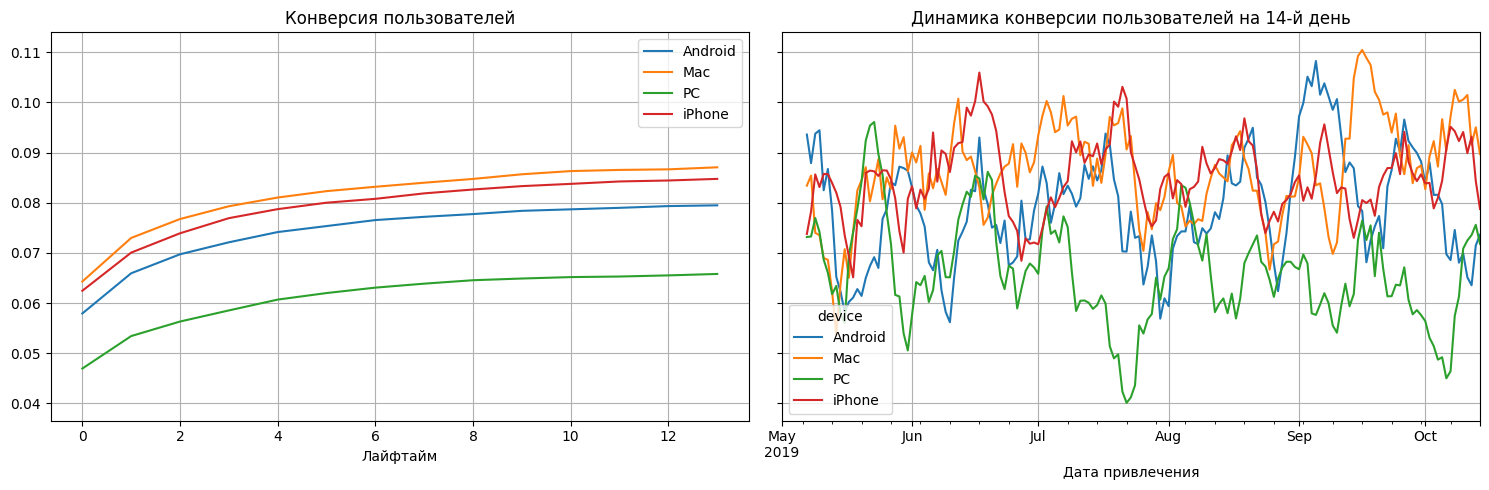

In [57]:
# получим данные для построения графиков конверсии по платформам:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_df, orders_df, max_date.date(), analysis_horizon, dimensions=['device']
)

# построим сами графики:
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

Самая высокая конверсия у платформы `Mac`, чуть ниже у `iPhone`, затем идет `Android`. `PC` отстает со значительным отрывом и имеет 2 провала в динамике - в июле и октябре.

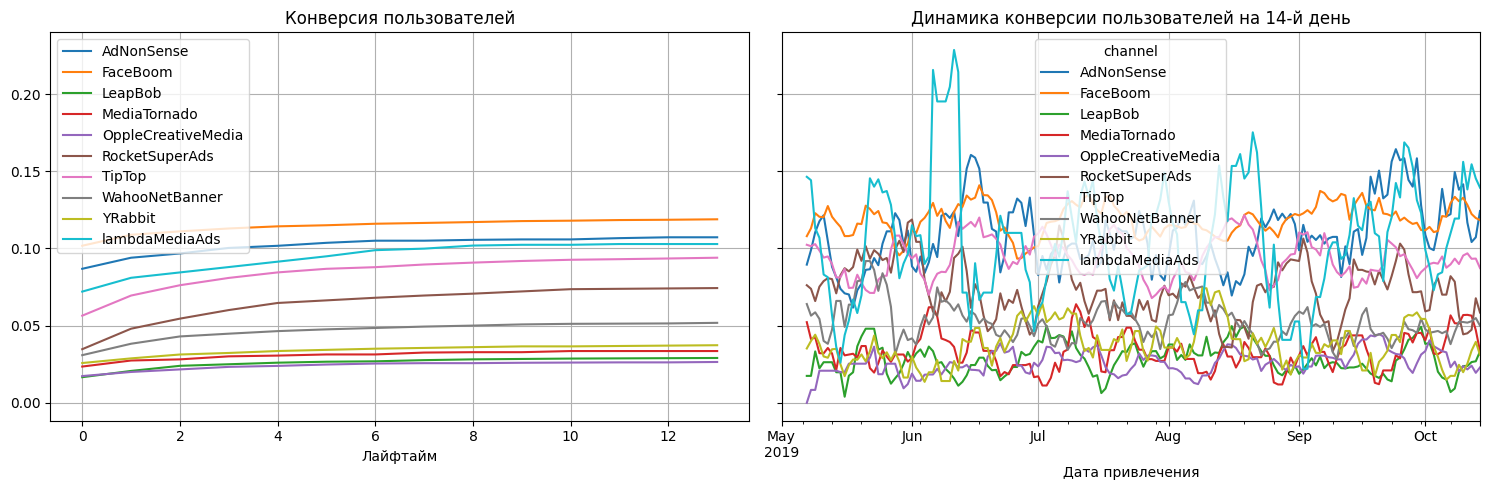

In [58]:
# получим данные для построения графиков конверсии по каналам привлечения:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_df, orders_df, max_date.date(), analysis_horizon, dimensions=['channel']
)

# построим сами графики:
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

Лидер по расходам бюджета - канал `TipTop` - всего лишь на 4 месте по конверсии.

Лидеры:
* `FaceBoom`
* `AdNonSence`
* `lambdaMediaAds`

По динамике привлечения самый стабильный - `FaceBoom`.

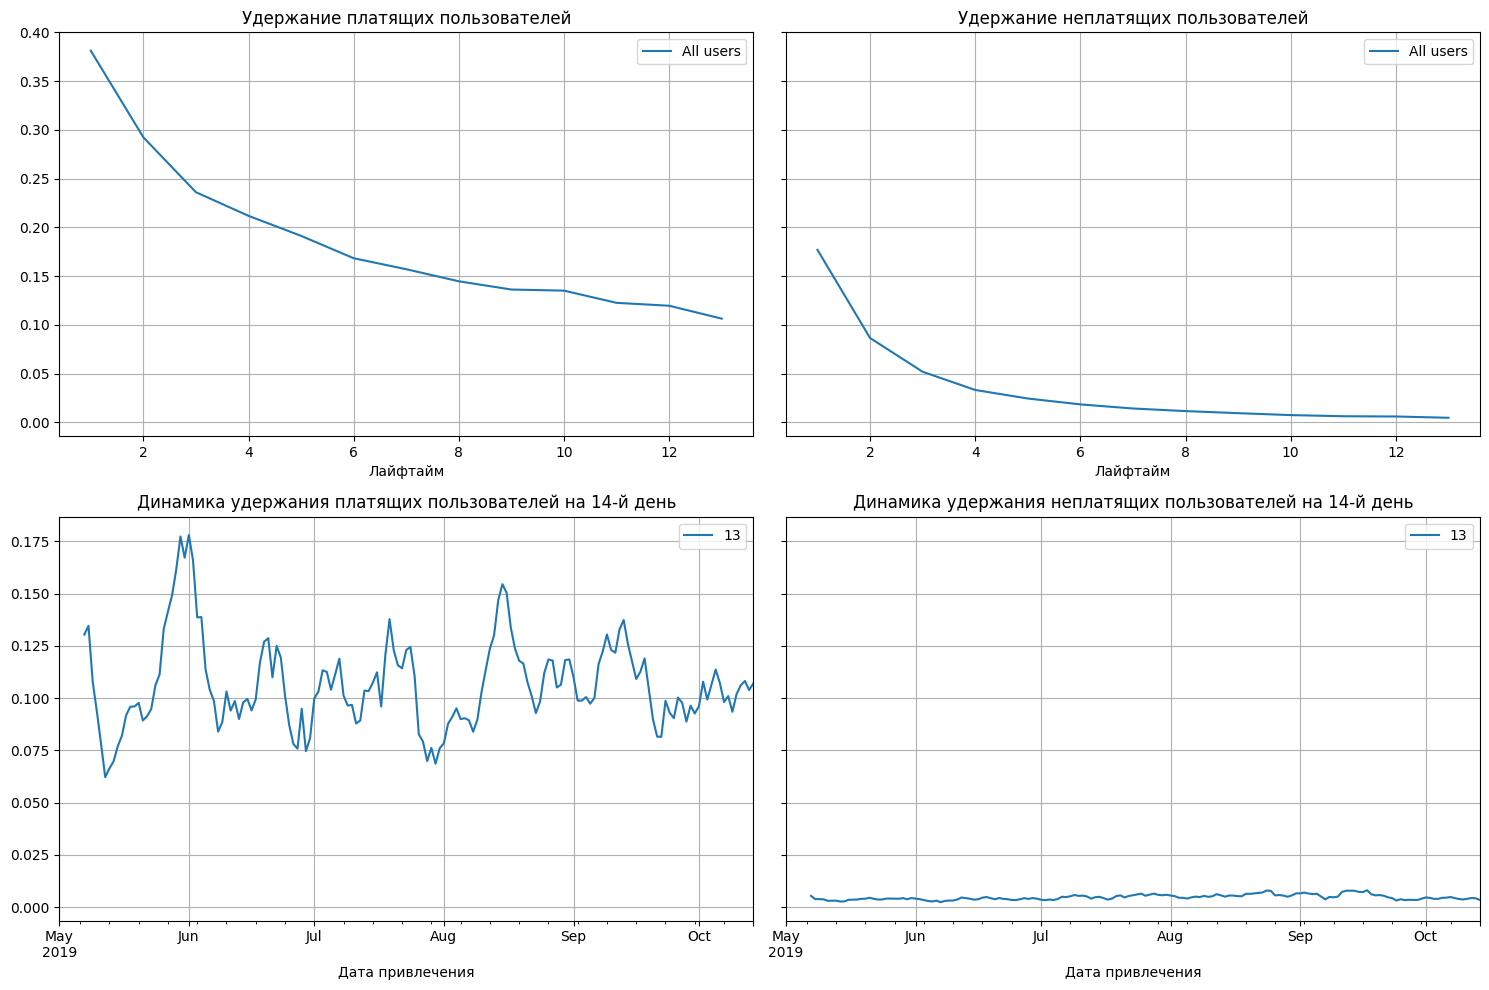

In [59]:
# получим данные для построения графиков удержания:
retention_raw, retention, retention_history = get_retention(
    profiles_df, visits_df, max_date.date(), analysis_horizon
)

# построим сами графики:
plot_retention(retention, retention_history, analysis_horizon, window=7)

Удеражание до 10 дня имеет характерный тренд, после 10 дня отток платящик пользователей усиливается. Разброс динамики удержания к концу анализируемого периода уменьшается.

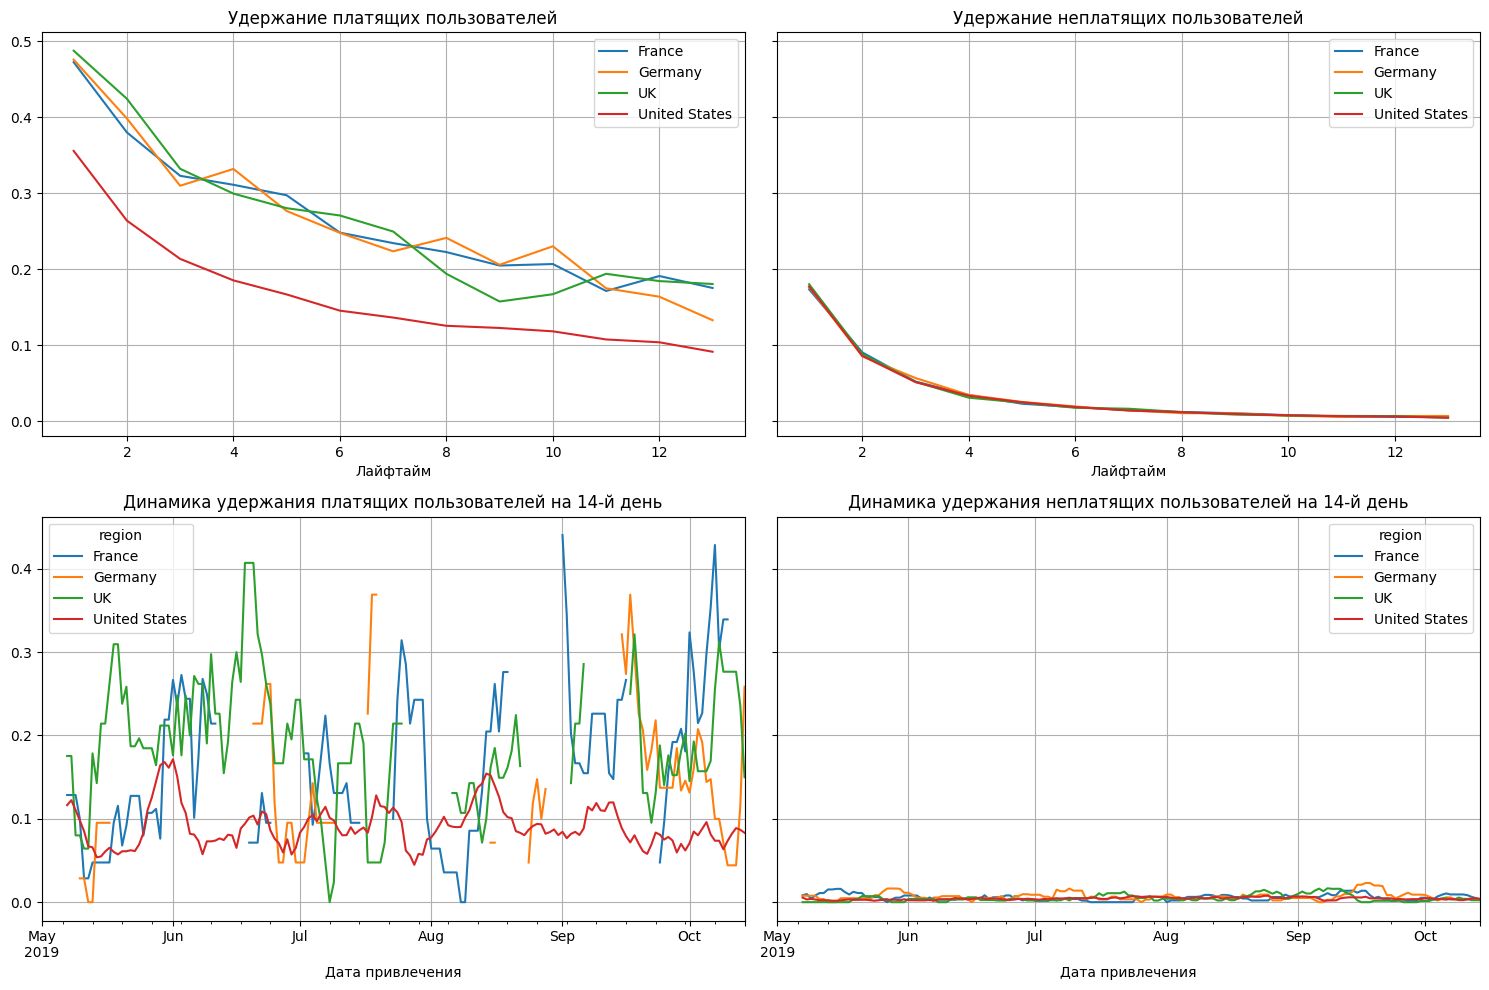

In [60]:
# получим данные для построения графиков удержания по регионам:
retention_raw, retention, retention_history = get_retention(
    profiles_df, visits_df, max_date.date(), analysis_horizon, dimensions=['region']
)

# построим сами графики:
plot_retention(retention, retention_history, analysis_horizon, window=7)

Самый плохой показатель удержания платящих пользователей в регионе `United States`. Остальные 3 близки между собой.
<br>В регионе `United States` к концу горизонта анализа удержание падает ниже 10%.
<br>В регионе `Germany` к концу горизонта анализа начинает резко падать после 10 дня.

Самая стабильная динамика удержания в регионе `United States`.

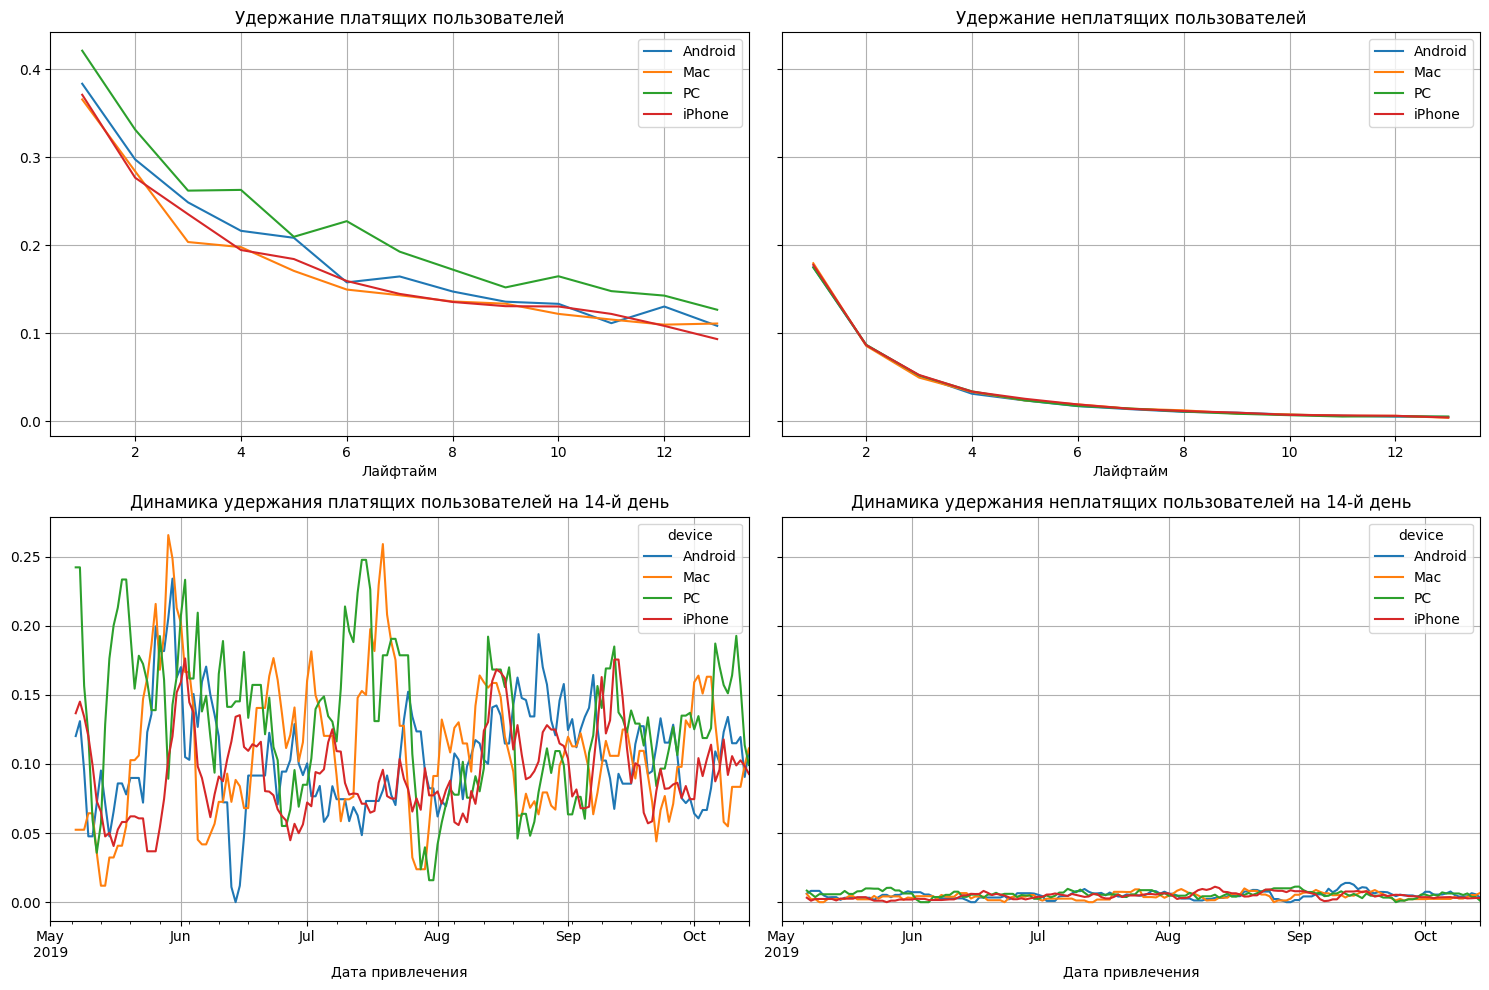

In [61]:
# получим данные для построения графиков удержания по платформам:
retention_raw, retention, retention_history = get_retention(
    profiles_df, visits_df, max_date.date(), analysis_horizon, dimensions=['device']
)

# построим сами графики:
plot_retention(retention, retention_history, analysis_horizon, window=7)

Худшее удержание платящих пользователей у платформы `iPhone`. Лучшее - у платформы `PC`.

Динамика удержания у платформы `PC` имеет самый большой разброс. Одномоментно доже падает до нуля.

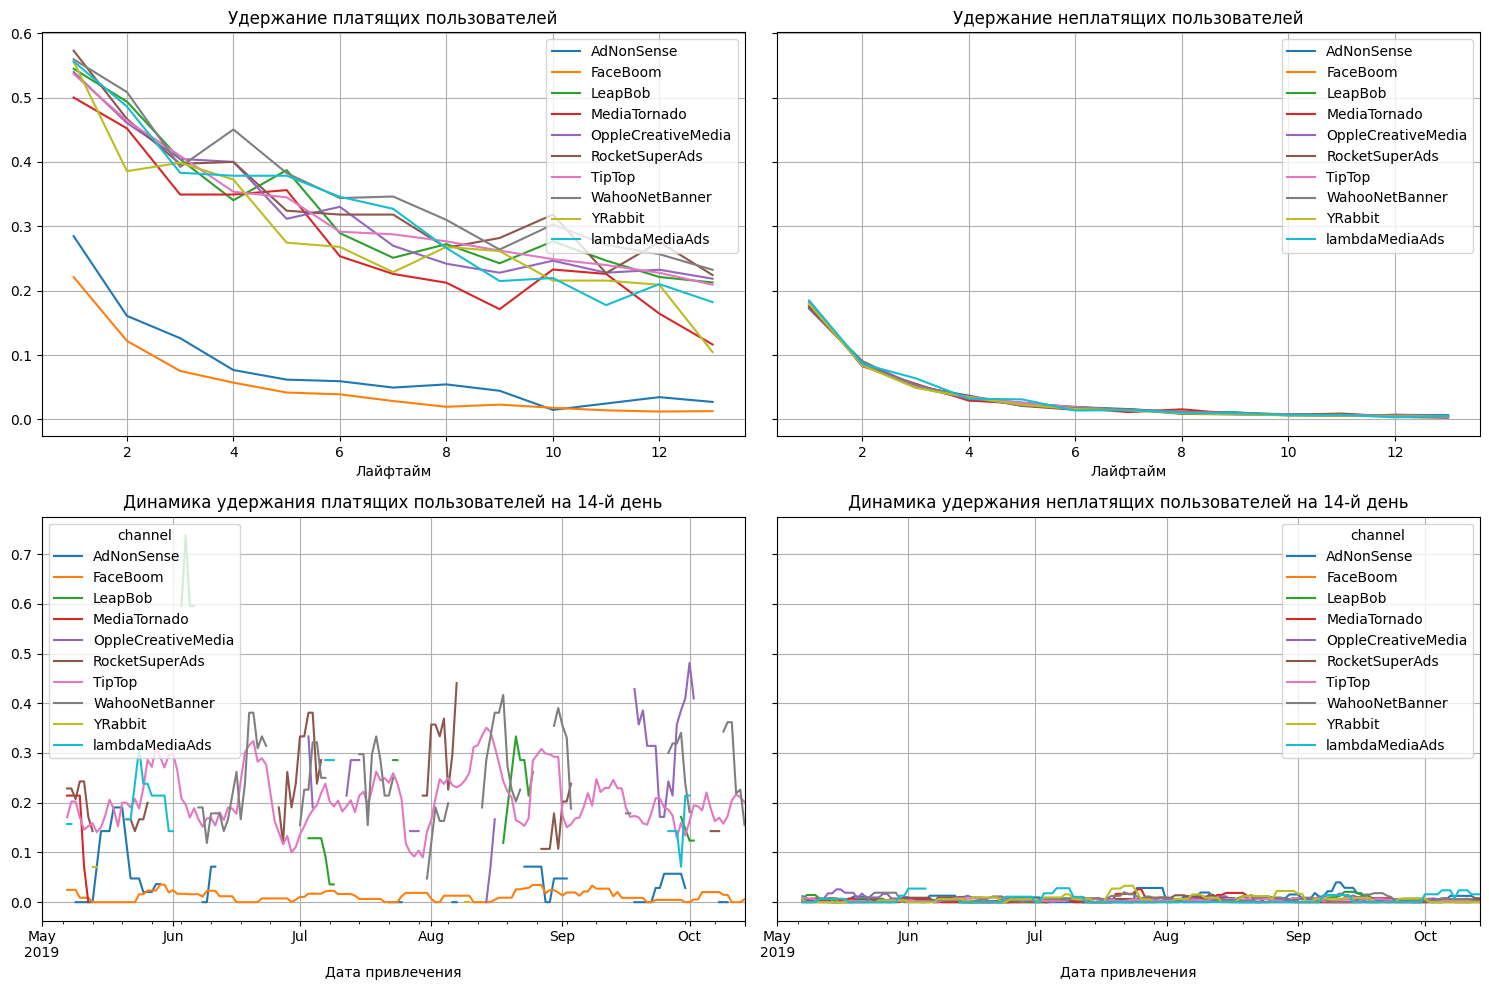

In [62]:
# получим данные для построения графиков удержания по каналам привлечения:
retention_raw, retention, retention_history = get_retention(
    profiles_df, visits_df, max_date.date(), analysis_horizon, dimensions=['channel']
)

# построим сами графики:
plot_retention(retention, retention_history, analysis_horizon, window=7)

Один из двух самых дорогоих каналов привлечения имеет наихудшие показатели удержания.
<br>Самый худший - `FaceBoom`, затем `AdNonSence`.

По динамике удержания опять самый худший - `FaceBoom`.



### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

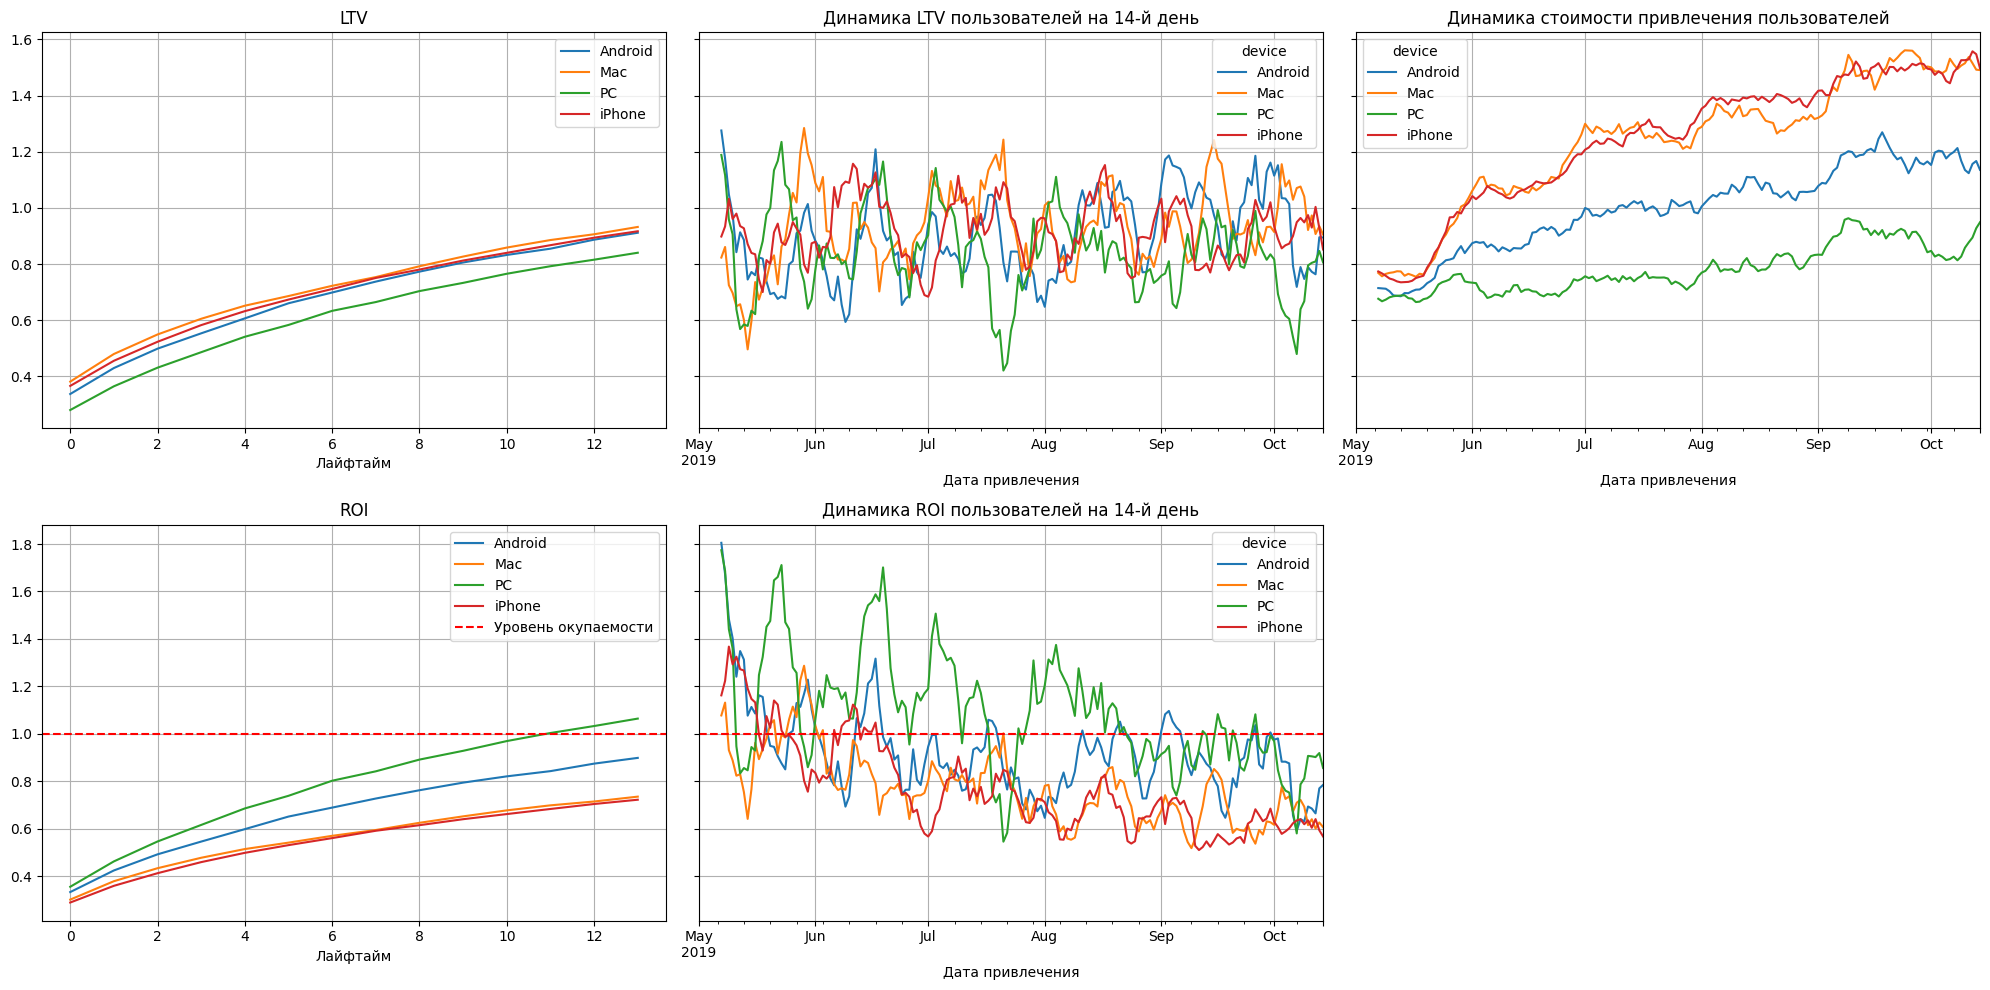

In [63]:
# получим данные для построения графиков LTV и ROI с разбивкой по устройствам:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_df, orders_df, max_date.date(), analysis_horizon, dimensions=['device'])

# построим сами графики:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=7)

Окупаются только 1 платформа - `PC`. Остальные три - убыточные.

Динамика ROI падает - связано с постоянно растущим маркетниговым бюджетом.

### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

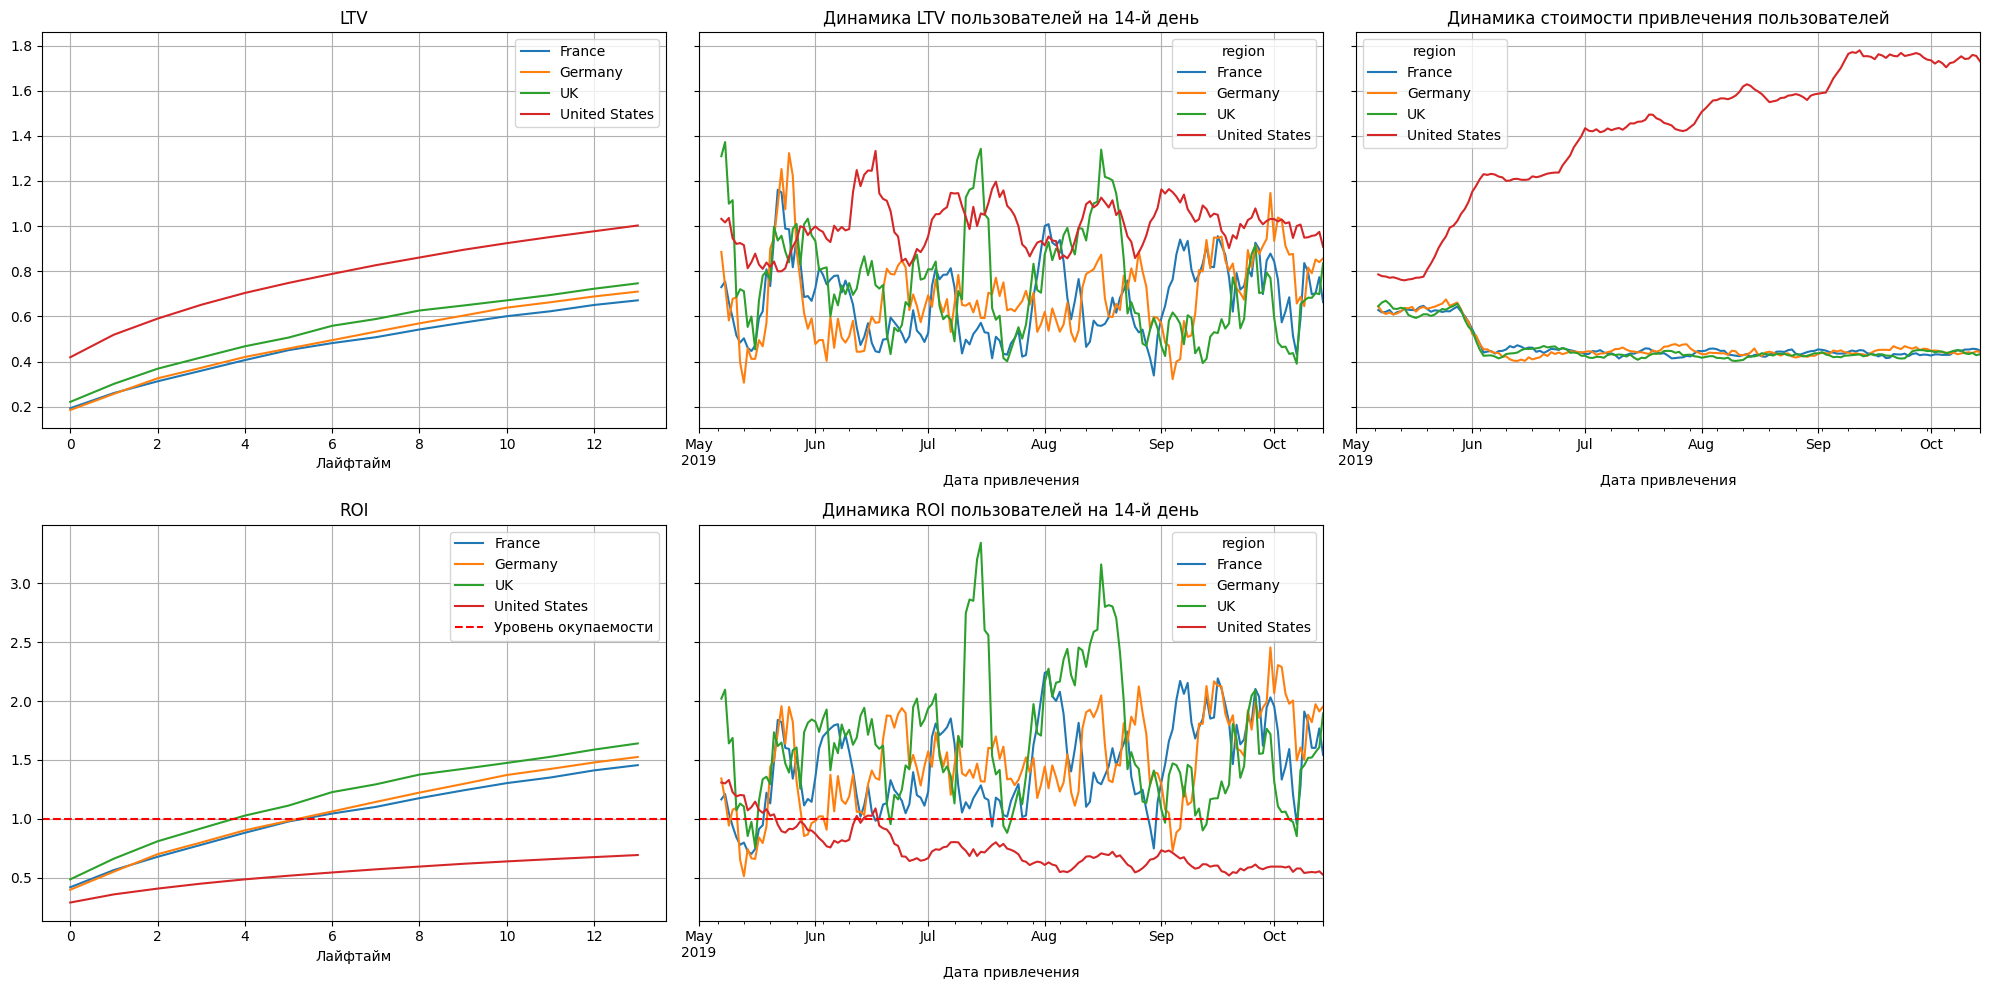

In [64]:
# получим данные для построения графиков LTV и ROI с разбивкой по регионам:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_df, orders_df, max_date.date(), analysis_horizon, dimensions=['region'])

# построим сами графики:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=7)

Динамика CAC резко растет только для 1 региона - `United States`. Для остальных рост наблюдался только в начале изучаемого периода, затем произошло снижение.

Это отражается на ROI - единственный убыточный регион - это тоже `United States`.

**Важно: в начале изучаемого периода регион `United States` тоже был прибыльным.**

Динамика ROI для трех регионов имеет высокую волатильность, но при этом держится в соновном выше границы рентабнльности.
<br>Самая стабильная динамика ROI  в регионе `United States` - практически все время ниже 100%.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

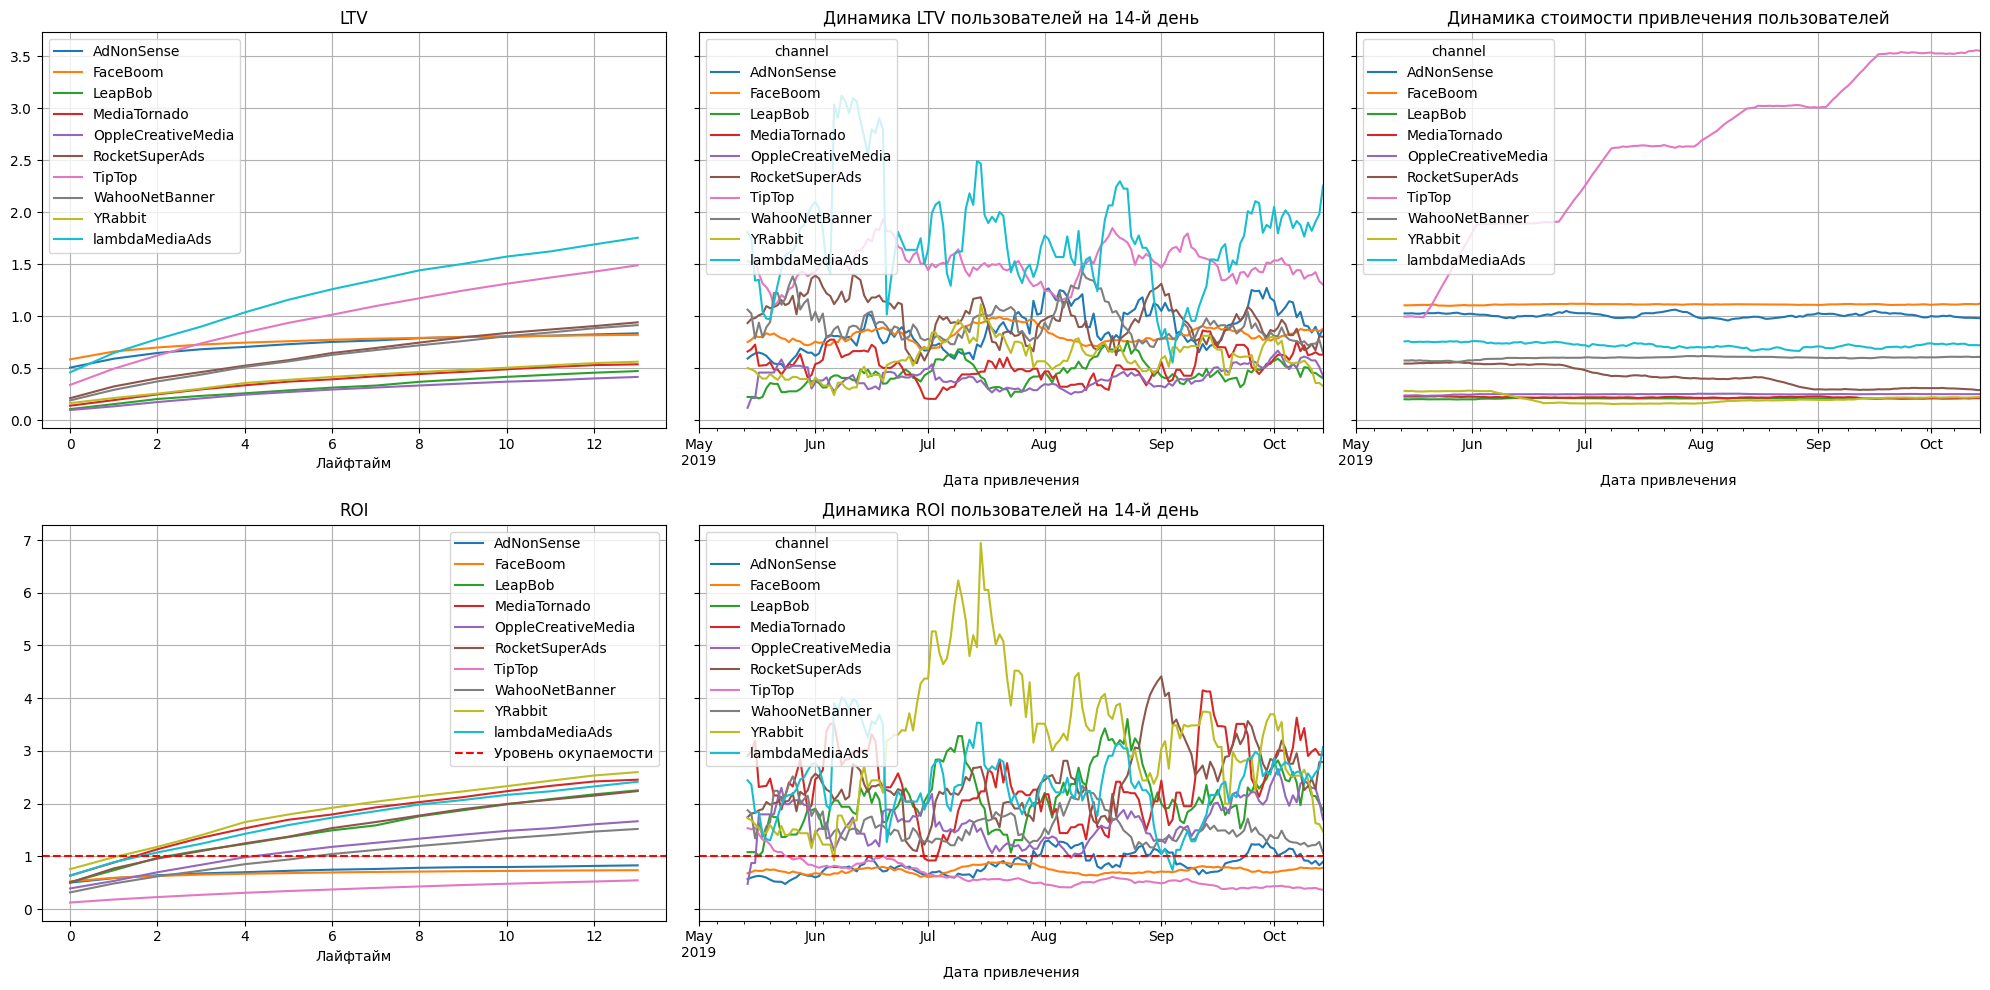

In [65]:
# получим данные для построения графиков LTV и ROI с разбивкой по рекламным каналам:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_df, orders_df, max_date.date(), analysis_horizon, dimensions=['channel'])

# построим сами графики:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

Увеличим их для более качественного анализа:

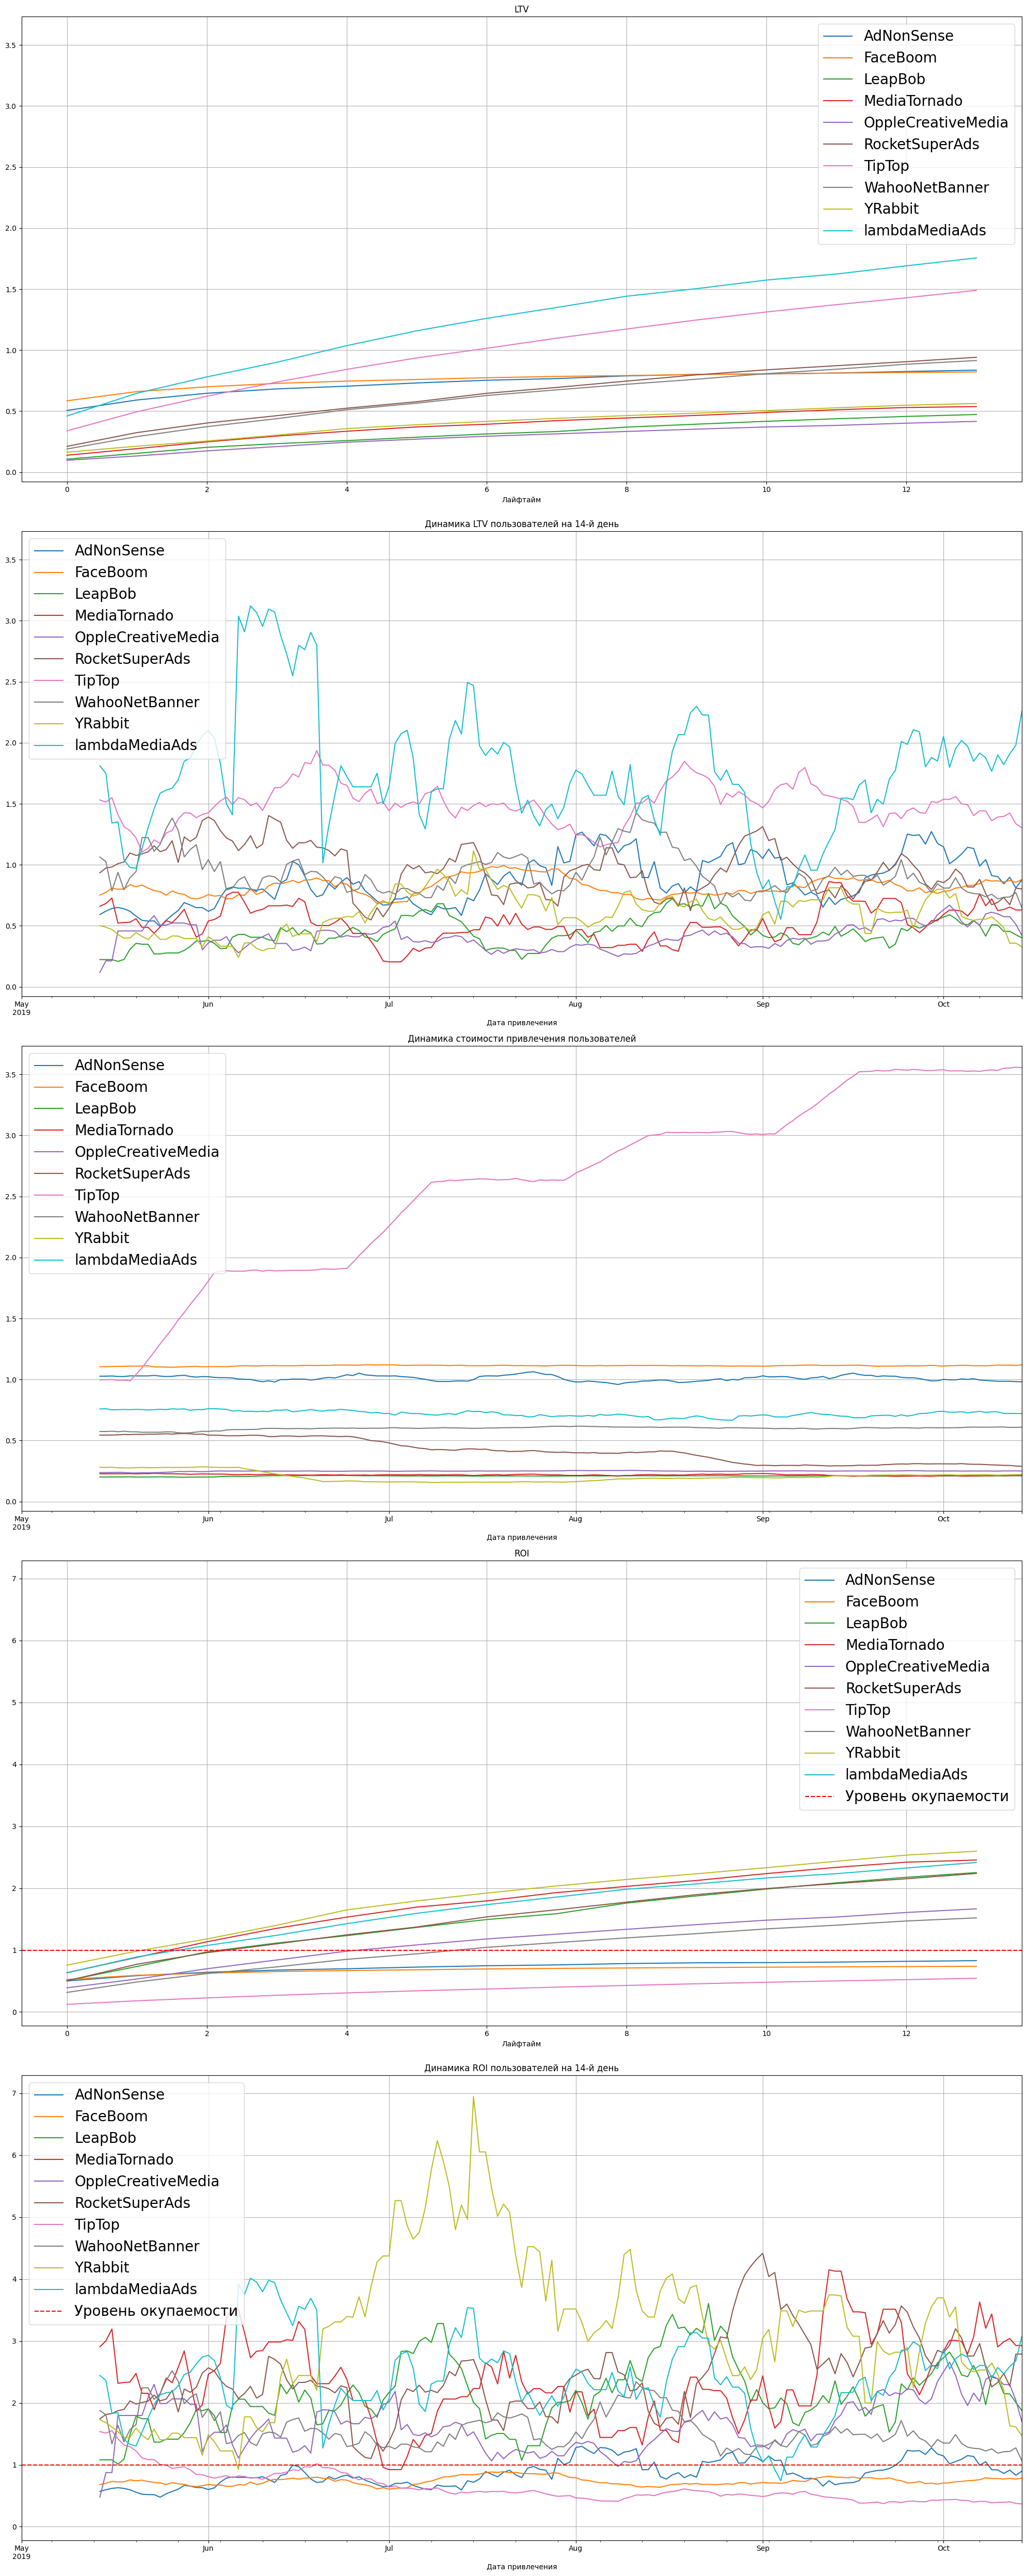

In [66]:
plot_ltv_roi_big(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

3 из 10 рекламных каналов, `TipTop`, `FaceBoom`, `AdNonSence`, не окупаются.
<br>При этом только один из них, `FaceBoom`, не окупался в течение всего периода анализа.
<br>Динамика CAC для 9 из 10 каналов оставалась на одном уровне или незначительно снижалась.
<br>Исключение составляет `FaceBoom` - для него CAC ступенчато рос на протяжении всего периода исследования.

### Вывод: Оценка окупаемости рекламы.

---

**Окупаемость рекламы в целом.**

В целом на горизонте 14 дней - **реклама НЕ окупается**

Тревожный тренд из п.4.4.3 (расходы на рекламу постоянно росли) дает о себе знать - драматический рост расходов на рекламу привел к тому, что уже почти сразу, в начале мая, ROI впервые пробил вниз границу рентабельности. Начиная **с середины июня** ROI выше 1 практически не бывает - **маркетинг стал убыточным.**

Большой разброс в динамике LTV.

---

**Конверсия и удержание.**

Общая конверсия достигает 8%, динамика конверсии имеет периодичность. В каждом месяц, за исключением сентября, имеют место сильные провалы. 

Отдельно необходимо рассмотреть сентябрь - единственный месяц, в котором нет сильных падений конверсии.

**По регионам:**
<br>Самая высокая конверсия в регионе `United States`, в остальных трех картина практически идентичная. Динамика конверсии в `United States` также значительно выше и имеет меньший диапазон колебаний.

**По платформам:**
<br>Самая высокая конверсия у платформы `Mac`, чуть ниже у `iPhone`, затем идет `Android`. `PC` отстает со значительным отрывом и имеет 2 провала в динамике - в июле и октябре.

**По каналам привлечения:**
<br>Лидер по расходам бюджета - канал `TipTop` - всего лишь на 4 месте по конверсии.

Лидеры:
* `FaceBoom`
* `AdNonSence`
* `lambdaMediaAds`

По динамике привлечения самый стабильный - `FaceBoom`.

---

**Окупаемость рекламы по платформам.**

Окупаются только 1 платформа - `PC`. Остальные три - убыточные.

Динамика ROI падает - связано с постоянно растущим маркетниговым бюджетом.

---

**Окупаемость рекламы по регионам.**

Динамика CAC резко растет только для 1 региона - `United States`. Для остальных рост наблюдался только в начале изучаемого периода, затем произошло снижение.

Это отражается на ROI - единственный убыточный регион - это тоже `United States`.

**Важно: в начале изучаемого периода регион `United States` тоже был прибыльным.**

Динамика ROI для трех регионов имеет высокую волатильность, но при этом держится в соновном выше границы рентабнльности.
<br>Самая стабильная динамика ROI  в регионе `United States` - практически все время ниже 100%.

---

**Окупаемость рекламы по каналам привлечения.**

3 из 10 рекламных каналов, `TipTop`, `FaceBoom`, `AdNonSence`, не окупаются.
<br>При этом только один из них, `FaceBoom`, не окупался в течение всего периода анализа.
<br>Динамика CAC для 9 из 10 каналов оставалась на одном уровне или незначительно снижалась.
<br>Исключение составляет `FaceBoom` - для него CAC ступенчато рос на протяжении всего периода исследования.

---

**Причины проблем окупаемости:**
* завышенный маркетинговый бюджет для каналов `FaceBoom` и `AdNonSence`
* экономически необоснованное увеличение маркетингового бюджета для канала `TipTop`

# Общий вывод.

<ins>**На этапе загрузки и предобработки данных было проделано:**</ins>

1. Загружены данных из 3х файлов:
* `visits_info_short.csv` - лог сервера с информацией о посещениях сайта, 
* `orders_info_short.csv` — информация о заказах, 
* `costs_info_short.csv` — информация о расходах на рекламу.
2. Названия столбцов во всех трех таблицах приведены к нормальному виду - прописные буквы заменены на строчные, пробелы на символ "_".
3. Все таблицы проверены на дубликаты - дубликатов не обнаружено.
4. Для 4 столбцов, хранящих дату и время, изменен формат данных с `object` на `datetime64`:
* `visits_df['session_start']`
* `visits_df['session_end']`
* `orders_df['event_dt']`
* `costs_df['dt']`

---

<ins>**Определены следующие функции:**</ins>

* get_profiles.
* get_retention
* get_conversion
* get_ltv
* filter_data
* plot_retention
* plot_conversion
* plot_ltv_roi
* plot_ltv_roi_big

---

<ins>**В процессе исследовательского анализа данных было проделано:**</ins>

Составлены профили пользователей. Определены минимальная и максимальная даты привлечения пользователей:
<br>Минимальная дата: 2019-05-01
<br>Максимальная дата: 2019-10-27

Определено, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построена таблица, отражающая количество пользователей и долю платящих из каждой страны.

К нам приходят пользователи из 4х стран:
* France
* Germany
* UK
* United States

Количество пользователей и конверсия распределены следующим образом:

|    Страна     | Пользователи | Конверсия|
|:------------- |:------------ |:-------- |
| United States |    100002    |   6.9%   |
|     UK        |     17575    |   4.0%   |
|    France     |     17450    |   3.8%   |
|    Germany    |     14981    |   4.1%   |

Определено, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи:

| Устройство    | Пользователи | Конверсия|
|:------------- |:------------ |:-------- |
| iPhone |    54479    |   6.2%   |
|     Android |	35032 |	5.9%  |
|    PC |	30455 |	5.0%   |
|    Mac |	30042 |	6.4%   |

Изучены рекламные источники привлечения и определены каналы, из которых пришло больше всего платящих пользователей:

|     Канал     | Пользователи | Конверсия|
|:------------- |:------------ |:-------- |
|organic |	56439 |	2.1% |
| FaceBoom |	29144 |	12.2% |
| TipTop |	19561 |	9.6% |
| OppleCreativeMedia |	8605 |	2.7% |
| LeapBob |	8553 |	3.1% |
| WahooNetBanner |	8553 |	5.3% |
| RocketSuperAds |	4448 |	7.9% |
| MediaTornado |	4364 |	3.6% |
| YRabbit |	4312 |	3.8% |
| AdNonSense |	3880 |	11.3% |
| lambdaMediaAds |	2149 |	10.5% |

---

<ins>**В процессе маркетингового ислледования было проделано:**</ins>

Посчитана общая сумму расходов на маркетинг:
<br>Общая сумма расходов на маркетинг за период с 01 мая 2019 г по 27 октября 2019 составила: **105 497.30**

Определено, как траты распределены по рекламным источникам:

2 явных лидера - `TipTop` и `FaceBoom`. Забирают 82.7% бюджета.
|Канал |  Затраты|
| :--- | ---: |
|TipTop |	54751.30 |
| FaceBoom |	32445.60 |
| WahooNetBanner |	5151.00 |
| AdNonSense |	3911.25 |
| OppleCreativeMedia |	2151.25 |
| RocketSuperAds |	1833.00 |
| LeapBob |	1797.60 |
| lambdaMediaAds |	1557.60 |
| MediaTornado |	954.48 |
| YRabbit |	944.22 |

При этом привлекают суммарно 52% пользователей или 70.4% плательщиков (от платных каналов привлечения).

Визуализирована динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику:
<br>На основании графиков видно, что есть 2 явных лидера по расходам - `TipTop` и `FaceBoom`. По динамике безусловный лидер - `TipTop`.

Определено, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Для этого использованы профили пользователей.

С большим отрывом лидирует `TipTop`.
| Канал | CAC |
| :--- | ---: |
| TipTop |	2.80 |
| FaceBoom |	1.11 |
| AdNonSense |	1.01 |
| lambdaMediaAds |	0.72 |
| WahooNetBanner |	0.60 |
| RocketSuperAds |	0.41 |
| OppleCreativeMedia |	0.25 |
| YRabbit |	0.22 |
| MediaTornado |	0.22
| LeapBob |	0.21 |
| organic |	0.00 |

Средний CAC по всем платным каналам привлечения: **0.8**

---

<ins>**Оценка окупаемости рекламы.**</ins>

**Окупаемость рекламы в целом.**

В целом на горизонте 14 дней - **реклама НЕ окупается**

Тревожный тренд из п.4.4.3 (расходы на рекламу постоянно росли) дает о себе знать - драматический рост расходов на рекламу привел к тому, что уже почти сразу, в начале мая, ROI впервые пробил вниз границу рентабельности. Начиная **с середины июня** ROI выше 1 практически не бывает - **маркетинг стал убыточным.**

Большой разброс в динамике LTV.

---

**Конверсия и удержание.**

Общая конверсия достигает 8%, динамика конверсии имеет периодичность. В каждом месяц, за исключением сентября, имеют место сильные провалы. 

Отдельно необходимо рассмотреть сентябрь - единственный месяц, в котором нет сильных падений конверсии.

**По регионам:**
<br>Самая высокая конверсия в регионе `United States`, в остальных трех картина практически идентичная. Динамика конверсии в `United States` также значительно выше и имеет меньший диапазон колебаний.

**По платформам:**
<br>Самая высокая конверсия у платформы `Mac`, чуть ниже у `iPhone`, затем идет `Android`. `PC` отстает со значительным отрывом и имеет 2 провала в динамике - в июле и октябре.

**По каналам привлечения:**
<br>Лидер по расходам бюджета - канал `TipTop` - всего лишь на 4 месте по конверсии.

Лидеры:
* `FaceBoom`
* `AdNonSence`
* `lambdaMediaAds`

По динамике привлечения самый стабильный - `FaceBoom`.

---

**Окупаемость рекламы по платформам.**

Окупаются только 1 платформа - `PC`. Остальные три - убыточные.

Динамика ROI падает - связано с постоянно растущим маркетниговым бюджетом.

---

**Окупаемость рекламы по регионам.**

Динамика CAC резко растет только для 1 региона - `United States`. Для остальных рост наблюдался только в начале изучаемого периода, затем произошло снижение.

Это отражается на ROI - единственный убыточный регион - это тоже `United States`.

**Важно: в начале изучаемого периода регион `United States` тоже был прибыльным.**

Динамика ROI для трех регионов имеет высокую волатильность, но при этом держится в соновном выше границы рентабнльности.
<br>Самая стабильная динамика ROI  в регионе `United States` - практически все время ниже 100%.

---

**Окупаемость рекламы по каналам привлечения.**

3 из 10 рекламных каналов, `TipTop`, `FaceBoom`, `AdNonSence`, не окупаются.
<br>При этом только один из них, `FaceBoom`, не окупался в течение всего периода анализа.
<br>Динамика CAC для 9 из 10 каналов оставалась на одном уровне или незначительно снижалась.
<br>Исключение составляет `FaceBoom` - для него CAC ступенчато рос на протяжении всего периода исследования.

---

**Не окупаются:**

регионы:
* `United States`

платформы:
* `iPhone`
* `Mac`
* `Android`

рекламные каналы:
* `TipTop`
* `FaceBoom`
* `AdNonSence`

---

**Причины проблем окупаемости:**
* завышенный маркетинговый бюджет для каналов `FaceBoom` и `AdNonSence`
* экономически необоснованное увеличение маркетингового бюджета для канала `TipTop`

---

**Рекомендации по результатам анализа:**

* LTV не должен использоваться в качестве KPI
* Добавить в KPI следующие показатели:
    - Revenue
    - ROI
    - UA (количество привлеченных пользователей)
* Каналы привлечения `TipTop`, `FaceBoom`, `AdNonSence` являются убыточными. Необходимо пересмотреть бюджеты в сторону уменьшения.
* Особое внимание обратить на канал `FaceBoom` - он никогда не был прибыльным.
* Проработать способы увеличеня конверсии для канала `organic` - это самый многочисленный канал по привлечению пользователей.
* По результатам проведенных мероприятий провести повторный анализ.